In [1]:

# note this script relies on certain libraries
# from what I can tell....
# matplotlib                2.2.3
# basemap                   1.0.7 
# other versions go funny
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap, shiftgrid, interp
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.io
from scipy.interpolate import griddata
from scipy import stats
import h5py 
import statistics as st
from astropy.io import ascii
import sys
import imp
import datetime
from itertools import chain
import subprocess
from tqdm import tqdm
sys.path.insert(0, '/Users/H/INVERSE/Python/')

import freedrift
import CurrentFuncs
imp.reload(freedrift)
imp.reload(CurrentFuncs)

<module 'CurrentFuncs' from '/Users/H/INVERSE/Python/CurrentFuncs.py'>

In [2]:
location =  % pwd
location

'/Users/H/INVERSE/Sylvia_data'

In [3]:
def reang(ang): return np.mod(ang+np.pi , 2*np.pi)- np.pi

In [4]:
file = '/Users/H/INVERSE/Kaimura/lonlat_gt60.xy'
ERA_U_d = '/Users/H/INVERSE/Kaimura/ERA'
DRIFT_d = '/Users/H/INVERSE/Kaimura/Drift'
GEO_W_d = '/Users/H/INVERSE/Kaimura/geo_currents'
NSIDC_d = '/Users/H/INVERSE/NASA_GSFC/'

grid_xy=np.genfromtxt(file)

In [19]:
# lets try to open PIOMAS
PIOMAS_d = '/Users/H/INVERSE/Kaimura/'
nx1=360
ny1=120

n_days   = 10
day_strd = 5
day_buff = 4

file = PIOMAS_d+'grid.dat'
grid_PMS=np.genfromtxt(file)
grid_PMS = np.reshape(grid_PMS,[2,ny1,nx1])

with open(PIOMAS_d+"hiday.H2014", "rb") as fr:
    ice = np.fromfile(fr, dtype=np.float32)
icePM = np.reshape(ice,[365,ny1,nx1])

/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


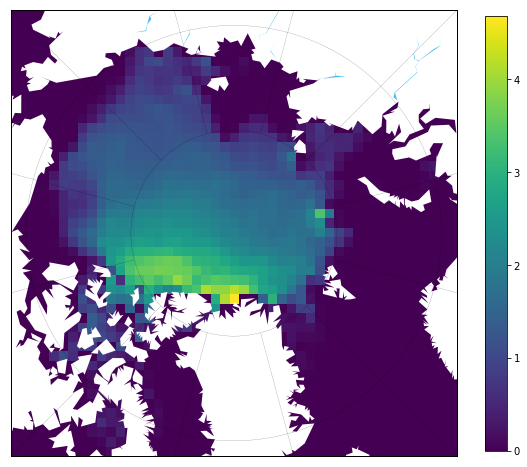

In [20]:
#Reading binary data in python: PIOMAS data

time_use = datetime.datetime(2014,7,21)
yday = time_use.timetuple().tm_yday

#etc
plt.figure(figsize=[10,10])
map = Basemap(projection='stere', lon_0=-45, lat_0=90, lat_ts=70, 
        urcrnrlat=60, urcrnrlon=90, llcrnrlat=60,  llcrnrlon=270)
new_res = 100e3
lonsG, latsG, xptsG, yptsG = CurrentFuncs.defGrid(map,dxRes=new_res)
xptsM, yptsM= map(grid_xy[:,0], grid_xy[:,1])
xPM, yPM = map(grid_PMS[0,:,:], grid_PMS[1,:,:])
hi_local = griddata((xPM.ravel(), yPM.ravel()),icePM[yday,:,:].ravel(), (xptsG, yptsG), method='linear')
# mapC.drawcoastlines()
img = map.imshow(hi_local, interpolation='none')
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')
map.drawparallels(np.arange(90,-90,-10), linewidth = 0.25, zorder=3)
map.drawmeridians(np.arange(-180.,180.,30.), linewidth = 0.25, zorder=3)
# ice = np.ma.masked_greater(ice, 1.0)
plt.colorbar(shrink=0.8)
plt.show()

/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


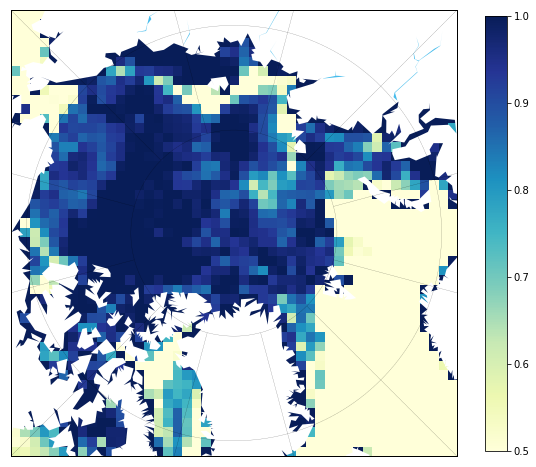

In [21]:
#Reading binary data in python: example Sea Ice Concentration data from NSIDC
dimX = 304 #number of rows
dimY = 448 #number of columns
NSIDC_d = '/Users/H/INVERSE/NASA_GSFC/'
time_use = datetime.datetime(2014,6,1)
infile = NSIDC_d+"nt_"+time_use.strftime('%Y%m%d')+"_f17_v1.1_n.bin"
with open(infile, 'rb') as fr:
    hdr = fr.read(300)
    ice = np.fromfile(fr, dtype=np.uint8)

ice = ice.reshape(dimY,dimX)
ice = np.flipud(ice)
ice = ice / 250.

#etc
plt.figure(figsize=[10,10])
mapC = Basemap(projection='stere', lon_0=-45, lat_0=90, lat_ts=70, 
        urcrnrlat=31.37 , urcrnrlon=102.34, llcrnrlat=33.92,  llcrnrlon=279.26)
lonsC, latsC, x, y = mapC.makegrid(dimX, dimY, returnxy=True)
map = Basemap(projection='stere', lon_0=-45, lat_0=90, lat_ts=70, 
        urcrnrlat=60, urcrnrlon=90, llcrnrlat=60,  llcrnrlon=270)
new_res = 100e3
lonsG, latsG, xptsG, yptsG = CurrentFuncs.defGrid(map,dxRes=new_res)
xptsM, yptsM= map(grid_xy[:,0], grid_xy[:,1])
x, y = map(lonsC, latsC)
conc_local = griddata((x.ravel(), y.ravel()),ice.ravel(), (xptsG, yptsG), method='linear')
# mapC.drawcoastlines()
img = map.imshow(conc_local, interpolation='none', cmap='YlGnBu',vmin = 0.5,vmax = 1.0 )
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')
map.drawparallels(np.arange(90,-90,-10), linewidth = 0.25, zorder=3)
map.drawmeridians(np.arange(-180.,180.,30.), linewidth = 0.25, zorder=3)
# ice = np.ma.masked_greater(ice, 1.0)
plt.colorbar(shrink=0.8)
plt.show()

In [8]:
time_use.timetuple().tm_yday


152

In [9]:
# open and check arrows over speed colour the three velocity vectors
# scripts frm Alek modules
# what map do I actually want to use?
# Basin only cover the important bit, but no further than minimum for the time period
# lonsG, latsG, xptsG, yptsG = CurrentFuncs.defGrid(map,dxRes=box_size/20)
# xptsM, yptsM= map(grid_xy[:,0], grid_xy[:,1])
#THIS IS FOR SINGLE DATA SO DAILY

plt.figure(figsize=[20,20])
time_use = datetime.datetime(2014,6,1)
file = ERA_U_d+'/u10_'+time_use.strftime('%Y%m%d')+'.xy'
res=2
plt.subplot(2,2,1)
xvelG,yvelG = CurrentFuncs.getGriddedKimura(map,file,grid_xy[:,0],
                                                xptsG, yptsG, lonsG, latsG, xptsM, yptsM)
speed = np.hypot(xvelG,yvelG)
img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 10.0 )
Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                units='inches',scale=20,  color='0.4', zorder=5)
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')
plt.title(time_use.strftime('%Y-%m-%d')+' ERA wind')
plt.colorbar(shrink=0.8)

plt.subplot(2,2,2)
file = DRIFT_d+'/kimura_drift_NH_'+time_use.strftime('%Y%m%d')+'.xy'
xvelG,yvelG = CurrentFuncs.getGriddedKimura(map,file,grid_xy[:,0],
                                                xptsG, yptsG, lonsG, latsG, xptsM, yptsM)
speed = np.hypot(xvelG,yvelG)
img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.3 )
Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                units='inches',scale=0.5,  color='0.4', zorder=5)
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')
plt.title(time_use.strftime('%Y-%m-%d')+' Kimura Drift')
plt.colorbar(shrink=0.8)

plt.subplot(2,2,3)
time_use = datetime.datetime(2014,7,1)
file = GEO_W_d+'/currents_'+time_use.strftime('%Y%m%d')+'.xy'
xvelG,yvelG = CurrentFuncs.getGriddedKimura(map,file,grid_xy[:,0],
                                                xptsG, yptsG, lonsG, latsG, xptsM, yptsM)
speed = np.hypot(xvelG,yvelG)
img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.1 )
Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                units='inches',scale=0.1,  color='0.4', zorder=5)
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')
plt.title(time_use.strftime('%Y-%m-%d')+' CryoSat Currents')
plt.colorbar(shrink=0.8)

plt.subplot(2,2,4)
# need concentration too
infile = NSIDC_d+"nt_"+time_use.strftime('%Y%m%d')+"_f17_v1.1_n.bin"
with open(infile, 'rb') as fr:
    hdr = fr.read(300)
    ice = np.fromfile(fr, dtype=np.uint8)

ice = ice.reshape(dimY,dimX)
ice = np.flipud(ice)
ice = ice / 250.
ice[ice>1.0]=np.NaN
# ice[ice<0.001]=np.NaN

#etc
conc_local = griddata((x.ravel(), y.ravel()),ice.ravel(), (xptsG, yptsG), method='linear')
img = map.imshow(conc_local, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 1.0 )
plt.colorbar(shrink=0.8)
map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')
# map.drawparallels(np.arange(90,-90,-10), linewidth = 0.25, zorder=3)
# map.drawmeridians(np.arange(-180.,180.,30.), linewidth = 0.25, zorder=3)
# ice = np.ma.masked_greater(ice, 1.0)
plt.title(time_use.strftime('%Y-%m-%d')+' NSIDC Concentration')
plt.subplots_adjust(hspace = 0.01,wspace=0.01)

plt.show()


/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3109: RuntimeWarning: invalid value encountered in greater_equal
  farnorth = np.abs(lats+dlat) >= 90.0
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/

NameError: name 'conc_cont' is not defined

In [17]:
# open and check arrows over speed colour the three velocity vectors
# scripts frm Alek modules
# what map do I actually want to use?
# Basin only cover the important bit, but no further than minimum for the time period
# lonsG, latsG, xptsG, yptsG = CurrentFuncs.defGrid(map,dxRes=box_size/20)
# xptsM, yptsM= map(grid_xy[:,0], grid_xy[:,1])
#THIS IS FOR SINGLE DATA SO DAILY
# USE THE SAME TO ACCUMULATE
# need the usual days plus stride length
# get a whole range, make a big 3d array of all the speed components by day and save them.

# FIRST ERA - extra space just in case -  so start in may finish end of september

time_start = datetime.datetime(2014,5,1)
time_end   = datetime.datetime(2014,10,1)
no_days = (time_end-time_start).days
# # ERA_grid_array = np.empty([np.shape(xvelG)[0],np.shape(xvelG)[1],2,no_days])
# dft_grid_array = np.empty([np.shape(xvelG)[0],np.shape(xvelG)[1],2,no_days])
# GEO_grid_array = np.empty([np.shape(xvelG)[0],np.shape(xvelG)[1],2,no_days])
# conc_grid_array= np.empty([np.shape(xvelG)[0],np.shape(xvelG)[1],no_days])
# hi_grid_array  = np.empty([np.shape(xvelG)[0],np.shape(xvelG)[1],no_days])
# for i in range(no_days):
#     time_use = time_start+datetime.timedelta(days = i)
#     print(i,no_days,time_use.strftime('%Y%m%d'))
# #     file = ERA_U_d+'/u10_'+time_use.strftime('%Y%m%d')+'.xy'
# #     xvelG,yvelG = CurrentFuncs.getGriddedKimura(map,file,grid_xy[:,0],
# #                                                 xptsG, yptsG, lonsG, latsG, xptsM, yptsM)
# #     ERA_grid_array[:,:,0,i] = xvelG
# #     ERA_grid_array[:,:,1,i] = yvelG
#     file = DRIFT_d+'/kimura_drift_NH_'+time_use.strftime('%Y%m%d')+'.xy'
#     xvelG,yvelG = CurrentFuncs.getGriddedKimura(map,file,grid_xy[:,0],
#                                                 xptsG, yptsG, lonsG, latsG, xptsM, yptsM)
#     dft_grid_array[:,:,0,i] = xvelG
#     dft_grid_array[:,:,1,i] = yvelG
#     file = GEO_W_d+'/currents_'+time_use.strftime('%Y%m%d')+'.xy'
#     xvelG,yvelG = CurrentFuncs.getGriddedKimura(map,file,grid_xy[:,0],
#                                                 xptsG, yptsG, lonsG, latsG, xptsM, yptsM)
#     GEO_grid_array[:,:,0,i] = xvelG
#     GEO_grid_array[:,:,1,i] = yvelG
#     infile = NSIDC_d+"nt_"+time_use.strftime('%Y%m%d')+"_f17_v1.1_n.bin"
#     with open(infile, 'rb') as fr:
#         hdr = fr.read(300)
#         ice = np.fromfile(fr, dtype=np.uint8)

#     ice = ice.reshape(dimY,dimX)
#     ice = np.flipud(ice)
#     ice = ice / 250.

#     conc_local = griddata((x.ravel(), y.ravel()),ice.ravel(), (xptsG, yptsG), method='linear')
#     conc_grid_array[:,:,i] = conc_local
    
# with open(PIOMAS_d+"hiday.H2014", "rb") as fr:
#     ice = np.fromfile(fr, dtype=np.float32)
# icePM = np.reshape(ice,[365,ny1,nx1])
# xPM, yPM = map(grid_PMS[0,:,:], grid_PMS[1,:,:])

# for i in range(no_days):
#     time_use = time_start+datetime.timedelta(days = i)
#     yday = time_use.timetuple().tm_yday
#     hi_local = griddata((xPM.ravel(), yPM.ravel()),icePM[yday,:,:].ravel(), (xptsG, yptsG), method='linear')
#     hi_grid_array[:,:,i] = hi_local
    

In [9]:
# it takes ages to process the gridded data to I'll save it
save_file = '/processed_maps_100km_may_sep.npz'
# np.savez(location+save_file, ERA_grid_array=ERA_grid_array,
#          dft_grid_array = dft_grid_array, GEO_grid_array = GEO_grid_array, 
#          conc_grid_array = conc_grid_array, hi_grid_array = hi_grid_array,
#          lonsG = lonsG, latsG = latsG)
npzfile =  np.load(location+save_file)
ERA_grid_array = npzfile['ERA_grid_array']
dft_grid_array = npzfile['dft_grid_array']
GEO_grid_array = npzfile['GEO_grid_array']
conc_grid_array= npzfile['conc_grid_array']
lonsG = npzfile['lonsG']
latsG = npzfile['latsG']


In [10]:
i=5
index1 = i*day_strd+day_buff
time_use1 = time_start+datetime.timedelta(days = index1)
time_use2 = time_start+datetime.timedelta(days = index1+n_days)
print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
xvelG = np.nanmean(ERA_grid_array[:,:,0,index1:index1+n_days],2)
yvelG = np.nanmean(ERA_grid_array[:,:,1,index1:index1+n_days],2)
conc_local = np.nanmean(conc_grid_array[:,:,index1:index1+n_days],2)
np.shape(conc_local)

NameError: name 'time_start' is not defined

20140515 20140525


/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes

20140525 20140604
20140604 20140614
20140614 20140624
20140624 20140704
20140704 20140714
20140714 20140724
20140724 20140803
20140803 20140813
20140813 20140823
20140823 20140902
20140902 20140912
20140912 20140922
20140922 20141002
20141002 20141012


/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1515: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


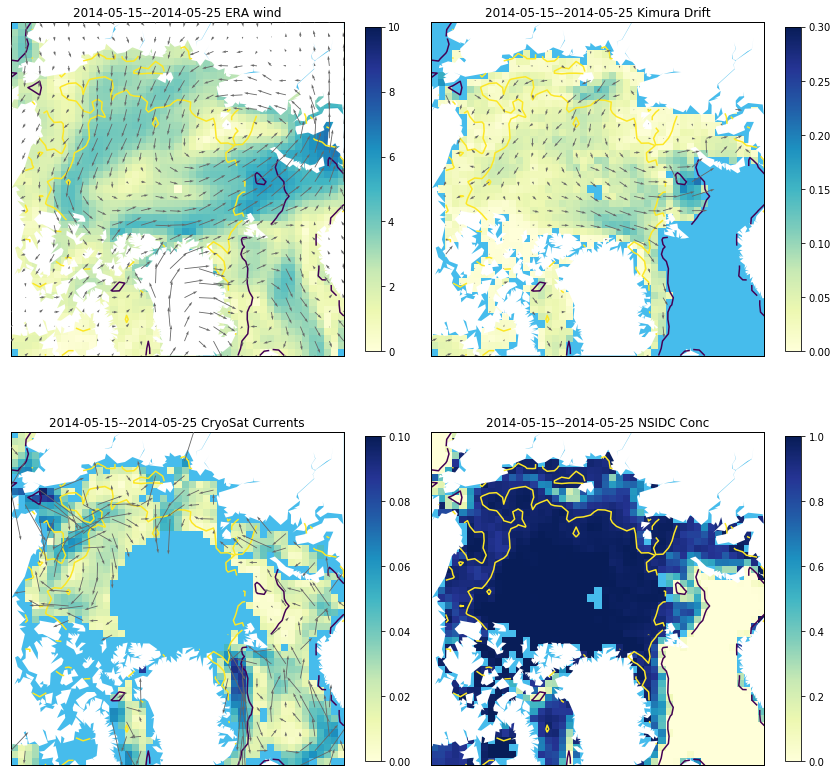

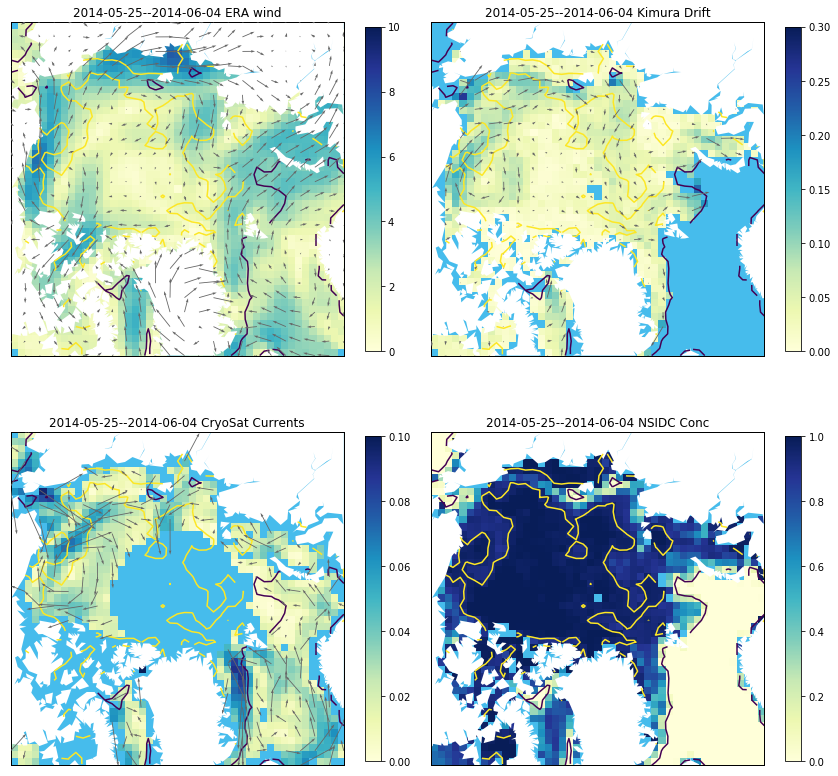

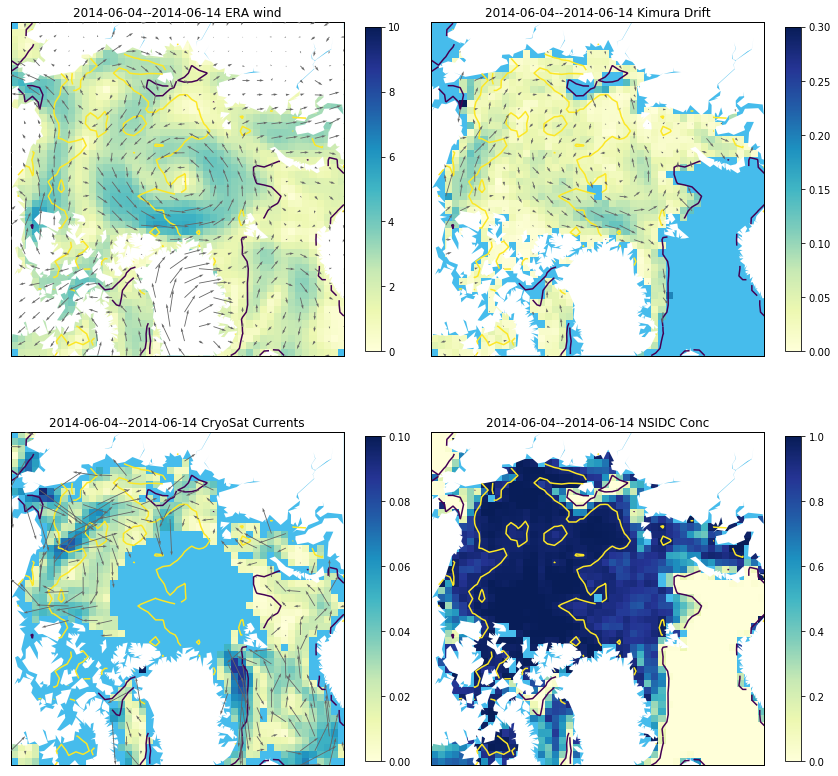

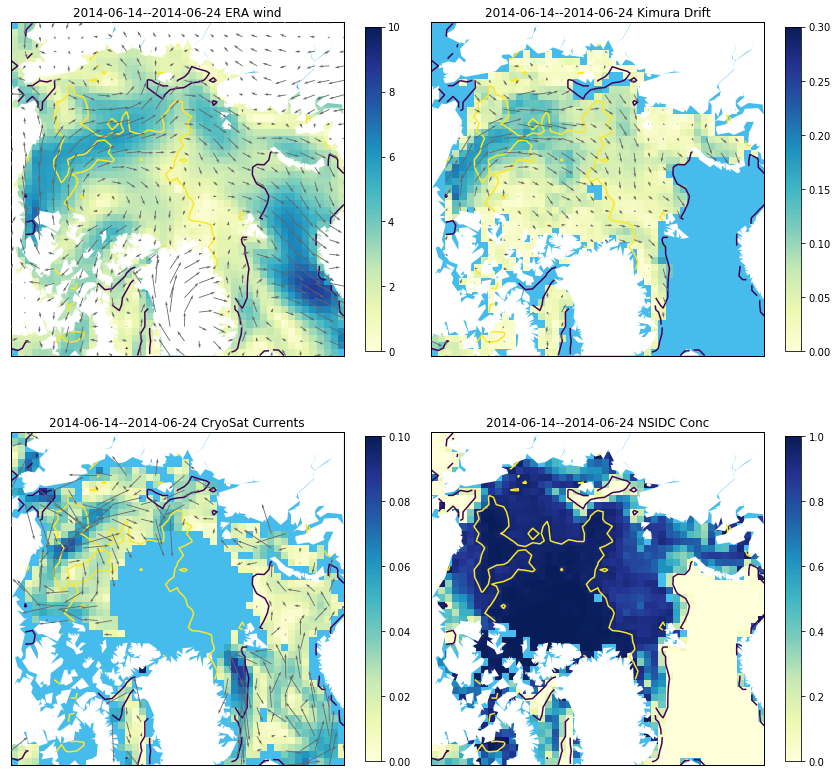

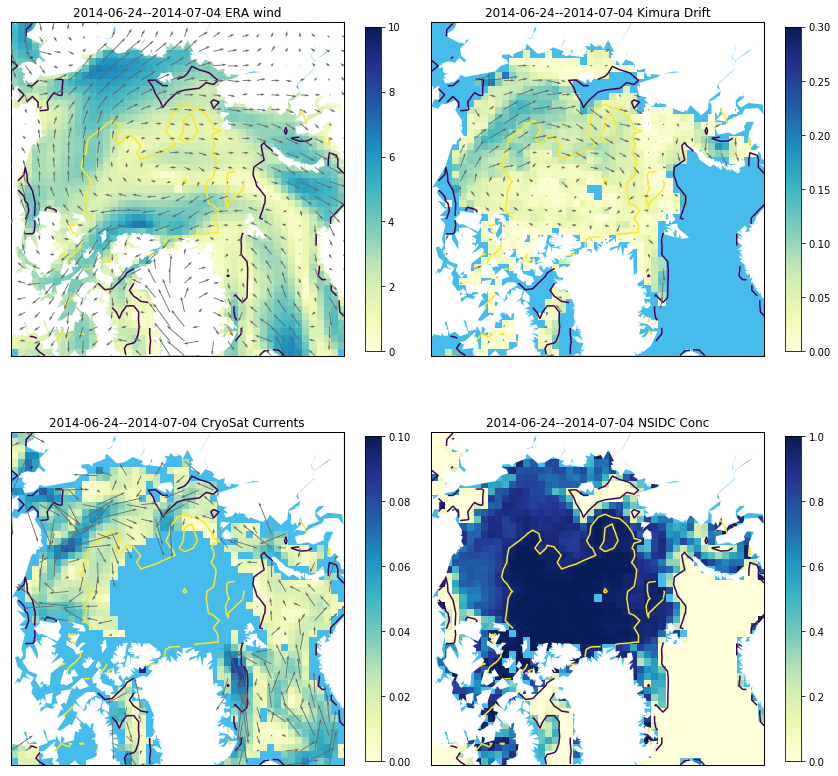

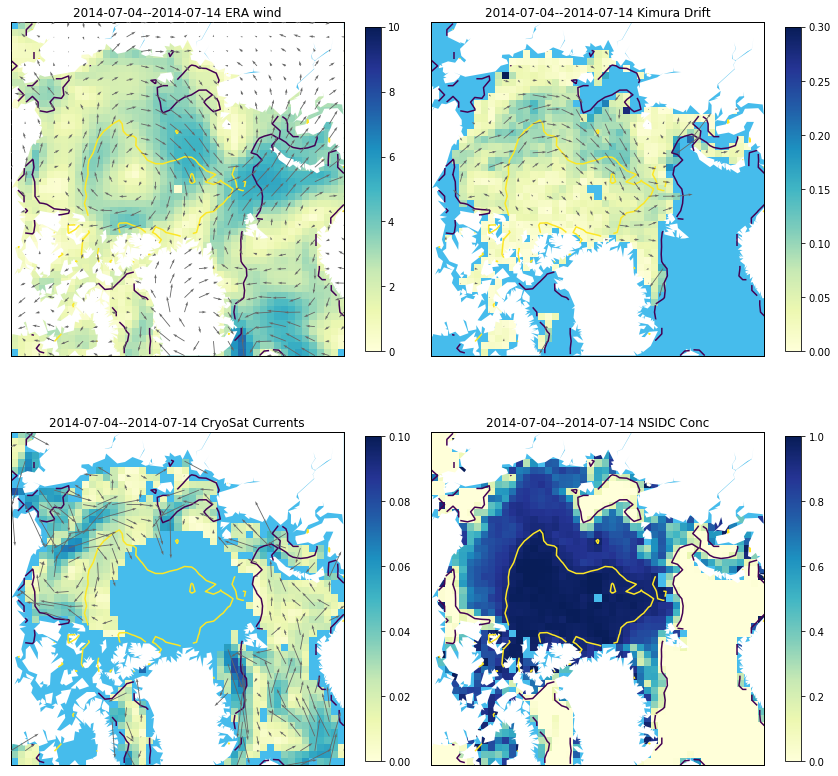

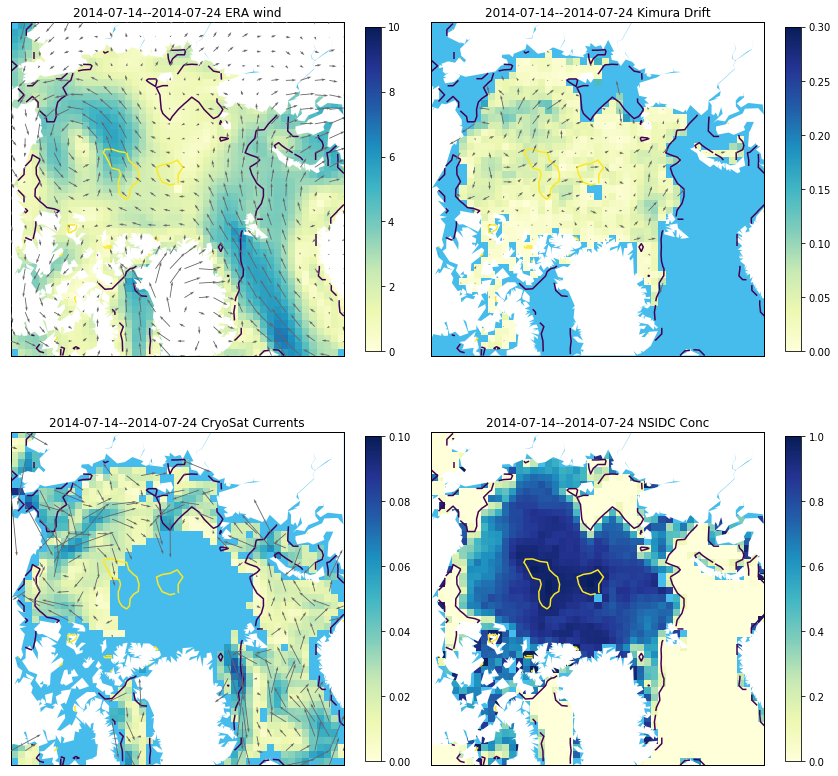

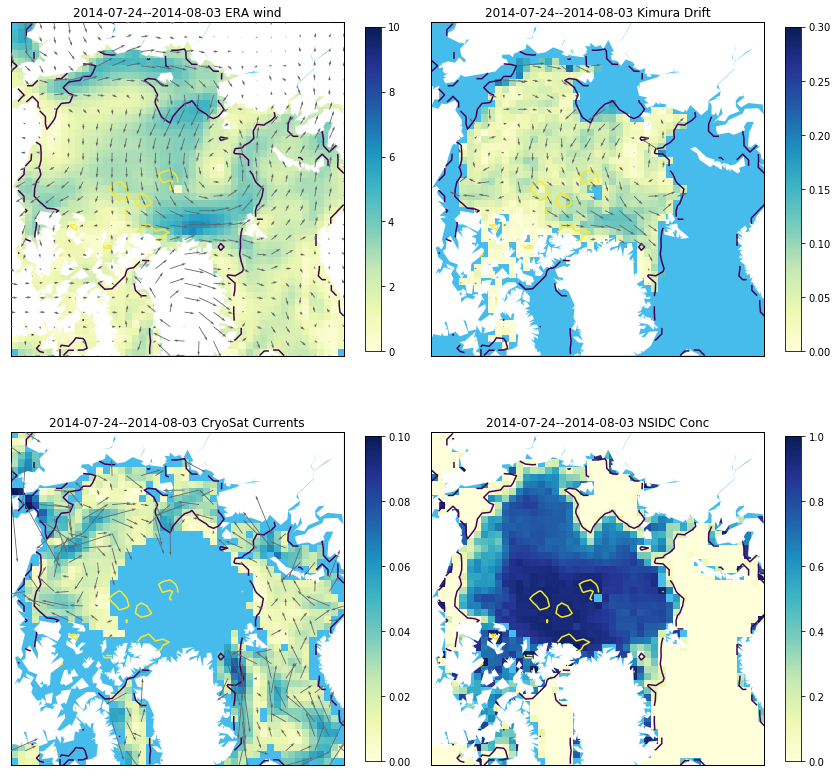

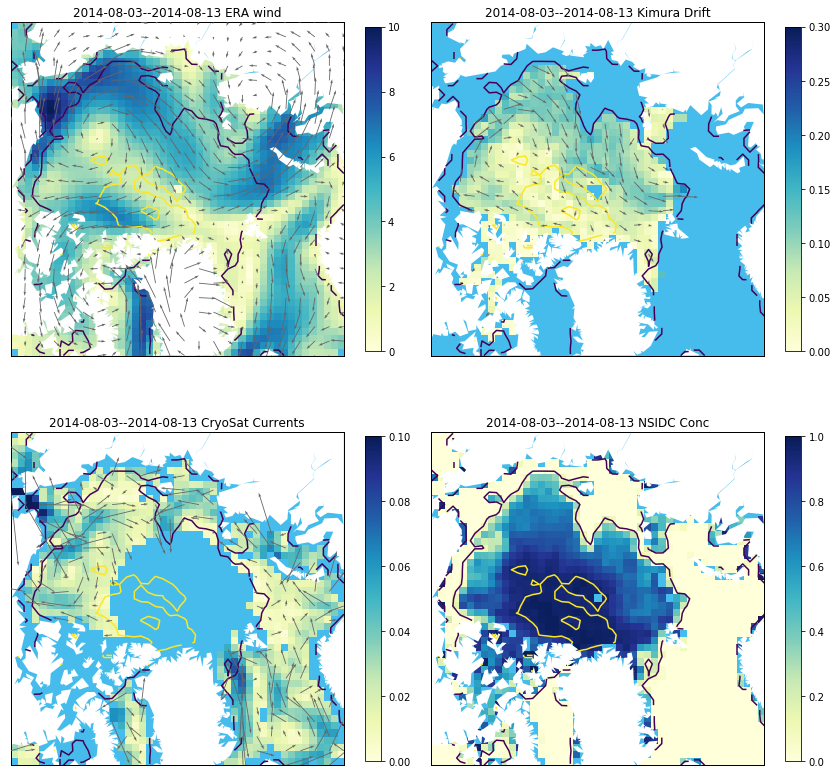

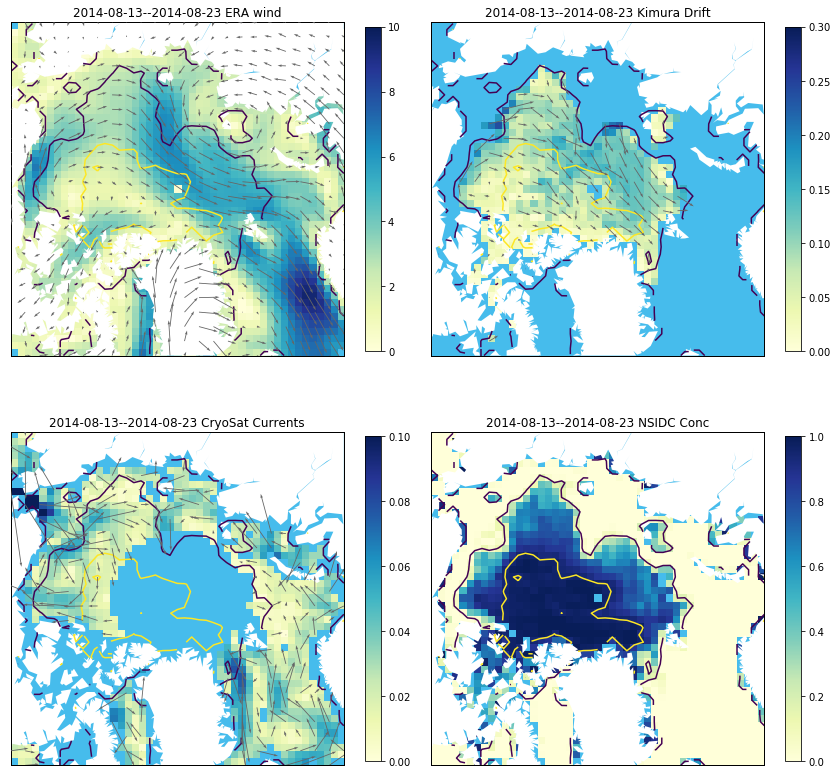

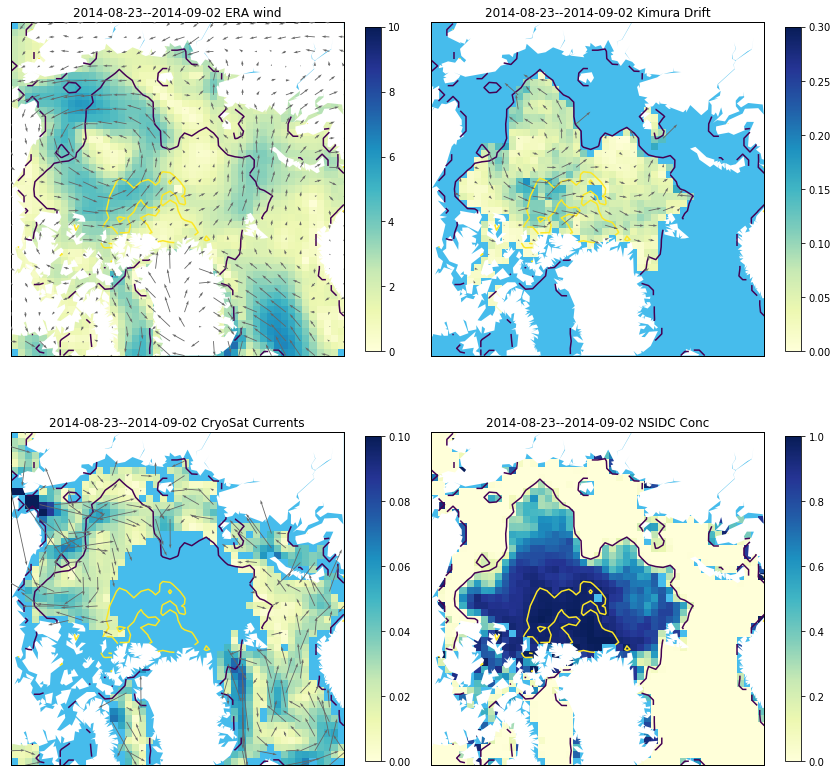

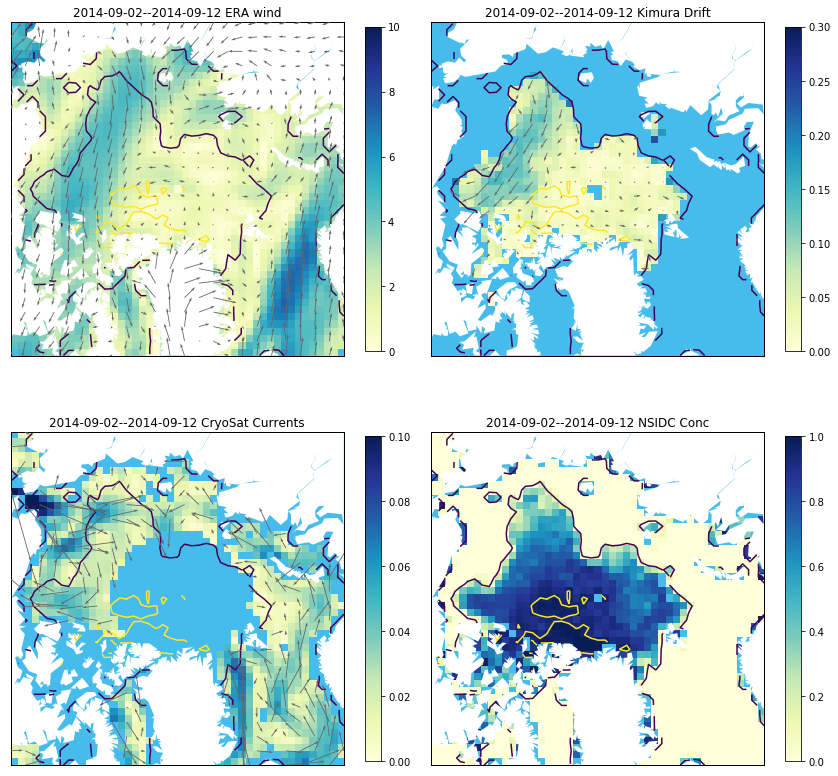

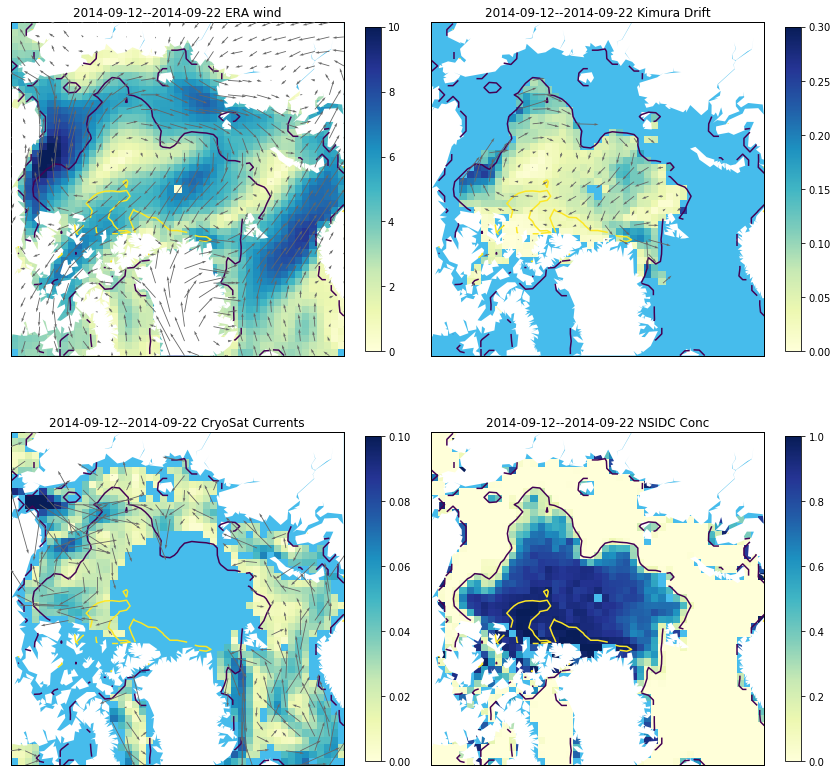

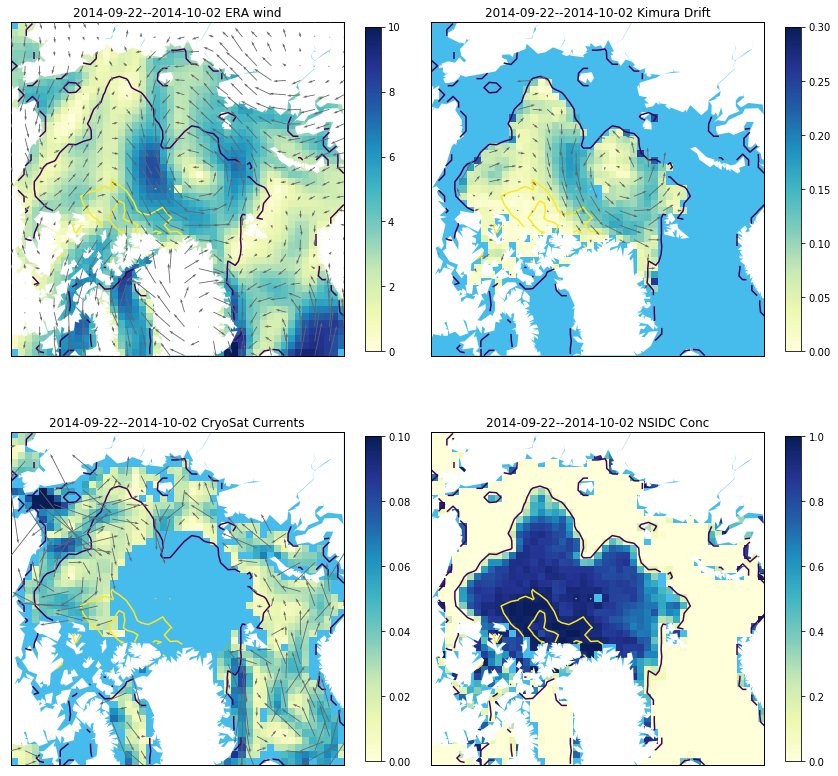

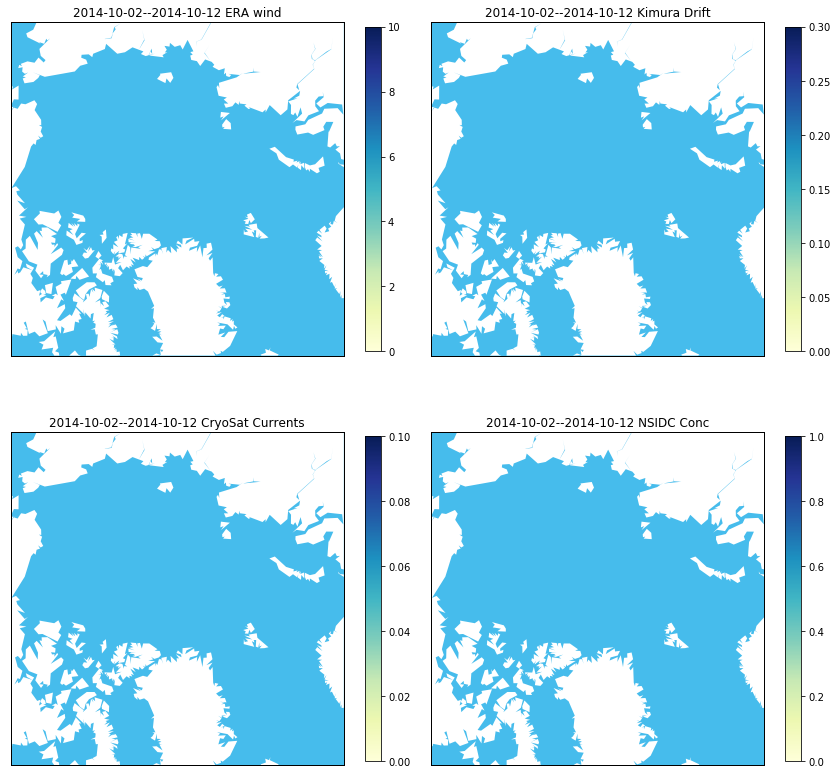

In [15]:
fig_location = '/Users/H/Documents/Tex/Reports/18-09-10_maps/'
# now to do the stride and 10 day averages
# previous processing hits july 4 - 13 inclusive
n_days   = 10
day_strd = 10
day_buff = 14
res=2
time_start = datetime.datetime(2014,5,1)
for i in range(3*5):
# for i in range(5,10):
# for i in range(5,6):
    index1 = i*day_strd+day_buff
    time_use1 = time_start+datetime.timedelta(days = index1)
    time_use2 = time_start+datetime.timedelta(days = index1+n_days)
    print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
    f = plt.figure(figsize=[15,15])
    # conc first for contours
    conc_local = np.nanmean(conc_grid_array[:,:,index1:index1+n_days],2)
    conc_local[conc_local>1.0]=np.NaN
    
    plt.subplot(2,2,1)
    xvelG = np.nanmean(ERA_grid_array[:,:,0,index1:index1+n_days],2)
    yvelG = np.nanmean(ERA_grid_array[:,:,1,index1:index1+n_days],2)
    speed = np.hypot(xvelG,yvelG)
    img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 10.0 )
    Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                    units='inches',scale=20,  color='0.4', zorder=5)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_local,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' ERA wind')

    plt.subplot(2,2,2)
    xvelG = np.nanmean(dft_grid_array[:,:,0,index1:index1+n_days],2)
    yvelG = np.nanmean(dft_grid_array[:,:,1,index1:index1+n_days],2)
    speed = np.hypot(xvelG,yvelG)
    img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.3 )
    Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                    units='inches',scale=0.5,  color='0.4', zorder=5)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_local,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Kimura Drift')

    plt.subplot(2,2,3)
    xvelG = np.nanmean(GEO_grid_array[:,:,0,index1:index1+n_days],2)
    yvelG = np.nanmean(GEO_grid_array[:,:,1,index1:index1+n_days],2)
    speed = np.hypot(xvelG,yvelG)
    img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.1 )
    Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                    units='inches',scale=0.1,  color='0.4', zorder=5)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_local,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' CryoSat Currents')

    plt.subplot(2,2,4)
    
    img = map.imshow(conc_local, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 1.0 )
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_local,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    # map.drawparallels(np.arange(90,-90,-10), linewidth = 0.25, zorder=3)
    # map.drawmeridians(np.arange(-180.,180.,30.), linewidth = 0.25, zorder=3)
    # ice = np.ma.masked_greater(ice, 1.0)
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' NSIDC Conc')
    plt.subplots_adjust(hspace = 0.01,wspace=0.01)
    f.savefig(fig_location+'sat_10day_'+time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+'.pdf',
              format='pdf',bbox_inches='tight')
plt.show()

In [60]:
np.shape(lonsG)[0],np.shape(lonsG)[1]

(47, 47)

In [13]:
# process for a single inversion
# array movements aren't the slow bit so lets just go over the arrays we've got
# need to work out the number of time points. Then whole array and filter bad points.
# BAD POINTS = no ice: conc >0.15, no currents: isfinite
# then save the data in 3d array for time 
n_days   = 10
day_strd = 5
day_buff = 4
nbals   = 5
time_start = datetime.datetime(2014,5,1)
# generally find the data - is it there, is there ice?
inv_mask = (np.isfinite(GEO_grid_array[:,:,0,:])*np.isfinite(conc_grid_array)*
    (conc_grid_array>0.15))#*(conc_grid_array<0.99))
# no. time points
invs_to_do_t = int(((datetime.datetime(2014,10,1)-datetime.datetime(2014,5,1)).days-(day_strd*nbals+n_days))/day_strd)
# invs_to_do_t = 1
inv_data_d = np.empty([np.shape(lonsG)[0],np.shape(lonsG)[1],invs_to_do_t,40],dtype=float)
inv_list_d = np.empty([np.shape(lonsG)[0],np.shape(lonsG)[1],invs_to_do_t,nbals+1],dtype=int)
for t in range(invs_to_do_t):
# for t in range(12,13):
    index1 = t*day_strd+day_buff
    index2 = index1+day_strd*nbals+n_days
    time_use1 = time_start+datetime.timedelta(days = index1)
    time_use2 = time_start+datetime.timedelta(days = index1+day_strd*nbals+n_days)
    print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
    for i in range(np.shape(lonsG)[0]):
        for j in range(np.shape(lonsG)[1]):
            # look at the input arrays: do we invert?
            bal_c = 0
            bal_p = np.zeros([nbals],int)
            for nb in range(nbals):
                if sum(inv_mask[i,j,index1+nb*day_strd:index1+nb*day_strd+n_days])>1:
#     for i in range(nbals):
#         if ( data_mean_single[day_start+i,9]>av_filter# number of atmo recs
#         and data_mean_5[day_start+i,4]*sig_filter>data_std_5[day_start+i,3]# current less than variance...
#         and data_mean_geo[day_start+i,3]*sig_filter>data_std_geo[day_start+i,3]# current less than variance...
#         and data_mean_single[day_start+i,4]*sig_filter >data_std_single[day_start+i,7]# wind less than variance...
#         and NSIDC_mean[day_start+i,0] > 0.1 # actual ice
#         # thorndike & colony filters small G : <<
# #         and (rhoo/rhoi/data_mean_single[day_start+i,7]/data_mean_single[day_start+i,8]*0.002>
# #              2*data_mean_geo[day_start+i,3]/data_mean_5[day_start+i,4]**2)
# #         1*np.hypot(data_mean_geo[day_start+i,1],data_mean_geo[day_start+i,2])/(data_mean_5[day_start+i,2]**2+data_mean_5[day_start+i,3]**2))
# #         and data_mean_single[day_start+i,4]>4e0 # Wind scaling
#         and data_mean_single[day_start+i,4]>1.0e-1):# Actual winds....
                    bal_p[bal_c] = index1+nb*day_strd
                    bal_c += 1
            inv_list_d[i,j,t,0] = bal_c
            inv_list_d[i,j,t,1:bal_c+1] = bal_p[0:bal_c]
            # load the crrect data in data in and save it

20140505 20140609
20140510 20140614
20140515 20140619
20140520 20140624
20140525 20140629
20140530 20140704
20140604 20140709
20140609 20140714
20140614 20140719
20140619 20140724
20140624 20140729
20140629 20140803
20140704 20140808
20140709 20140813
20140714 20140818
20140719 20140823
20140724 20140828
20140729 20140902
20140803 20140907
20140808 20140912
20140813 20140917
20140818 20140922
20140823 20140927


In [14]:
np.sum(inv_list_d[:,:,t,0]>2)

188

In [132]:
na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_i_o_O-A/'
# process for a single inversion
# array movements aren't the slow bit so lets just go over the arrays we've got
# need to work out the number of time points. Then whole array and filter bad points.
# BAD POINTS = no ice: conc >0.15, no currents: isfinite
# then save the data in 3d array for time 
# for t in range(invs_to_do_t):
for t in range(12,13):
    index1 = t*day_strd+day_buff
    index2 = index1+day_strd*nbals+n_days
    time_use1 = time_start+datetime.timedelta(days = index1)
    time_use2 = time_start+datetime.timedelta(days = index1+day_strd*nbals+n_days)
    print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
    print('Points to do for this time = ',np.sum(inv_list_d[:,:,t,0]>2))
    diag_p = 0
    for i in range(np.shape(lonsG)[0]):
        for j in range(np.shape(lonsG)[1]):
#     for j in range(13,14):
#         for i in range(31,32):
            nbals_use = inv_list_d[i,j,t,0]
            if nbals_use > 2:
                diag_p += 1
                print('Point no. ',diag_p,i,j,',nbals_use = ',nbals_use,', conc = ',conc_grid_array[i,j,t])
                data_in = np.ndarray([nbals_use*12+13],dtype='float32')
    
                beta_a = np.ndarray([nbals_use])
                beta_i = np.ndarray([nbals_use])
                beta_w = np.ndarray([nbals_use])
                beta_fb= np.ndarray([nbals_use])
                # for j in range(nbals_use):
                #     i = bal_p[j]
                #     beta_a[j] = 0.0/Bbeta_a # 1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
                #     beta_i[j] = 0.0/Bbeta_i # 1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
                #     beta_fb[j]= 1.0/Bbeta_fb# 1.0 #  data_mean_single[day_start+day+i,4]**-4
                for nb in range(nbals_use):
#                     i = bal_p[nb]
                    beta_a[nb] =  1.0 #     data_mean_big[day_start+day+i,2,d_w]**-2*Na2_scale**3
                    beta_i[nb] =  1.0 #  data_mean_single[day_start+day+i,4]**-2*Na2_scale
                    beta_fb[nb]=  1.0 #  data
                r = 0;
                data_in[0] = nbals_use;
            #     inv_list_d[dd,0]=nbals_use
                for nb in range(nbals_use):
            #         i = bal_p[j]
            #         i = bal_all[dd+j]-day_start
            #         inv_list_d[dd,1+j] = day_start + i
                    # wind data
                    index_nb = inv_list_d[i,j,t,nb+1]
                    data_in[1+0*nbals_use+nb] = np.nanmean(ERA_grid_array[i,j,0,index_nb:index_nb+n_days])
                    data_in[1+1*nbals_use+nb] = np.nanmean(ERA_grid_array[i,j,1,index_nb:index_nb+n_days])
                    data_in[1+2*nbals_use+nb] = np.hypot(data_in[1+0*nbals_use+nb],data_in[1+1*nbals_use+nb])
                    data_in[1+3*nbals_use+nb] = np.nanmean(np.hypot(
                        ERA_grid_array[i,j,0,index_nb:index_nb+n_days]
                        -data_in[1+0*nbals_use+nb],
                        ERA_grid_array[i,j,1,index_nb:index_nb+n_days]
                        -data_in[1+1*nbals_use+nb]))

                    data_in[1+4*nbals_use+nb] = np.nanmean(GEO_grid_array[i,j,0,index_nb:index_nb+n_days]
                        -dft_grid_array[i,j,0,index_nb:index_nb+n_days])
                    data_in[1+5*nbals_use+nb] = np.nanmean(GEO_grid_array[i,j,1,index_nb:index_nb+n_days]
                        -dft_grid_array[i,j,1,index_nb:index_nb+n_days])
                    data_in[1+6*nbals_use+nb] = np.hypot(data_in[1+4*nbals_use+nb],data_in[1+5*nbals_use+nb])
                    data_in[1+7*nbals_use+nb] = np.nanmean(np.hypot(
                        GEO_grid_array[i,j,0,index_nb:index_nb+n_days]-dft_grid_array[i,j,0,index_nb:index_nb+n_days]
                        -data_in[1+4*nbals_use+nb],
                        GEO_grid_array[i,j,1,index_nb:index_nb+n_days]-dft_grid_array[i,j,1,index_nb:index_nb+n_days]
                        -data_in[1+5*nbals_use+nb]))

                    data_in[1+8*nbals_use+nb] = beta_a[nb] ;r+=nbals_use # beta scalings - see above
                    data_in[1+9*nbals_use+nb] = beta_i[nb] ;r+=nbals_use
                    data_in[1+10*nbals_use+nb] = beta_fb[nb];r+=nbals_use
                    data_in[1+11*nbals_use+nb] = (
                                             np.nanmean(hi_grid_array[i,j,index_nb:index_nb+n_days])*
#                                            1.0* # constant ice thickness until I can get beter
                                             2*np.sin(np.deg2rad(latsG[i,j]))*2*np.pi/(24*60*60)) # hifc   
                r = 1 + 12 * nbals_use
                # other data/constants
                data_in[r] = rhoa ;r+=1
                data_in[r] = rhoi ;r+=1
                data_in[r] = rhoo ;r+=1
            #     data_in[r] = thAC ;r+=1
                # special for range
                data_in[r] = n2a_min;r+=1
                data_in[r] = n2a_max;r+=1
                data_in[r] = rop_min;r+=1
                data_in[r] = rop_max;r+=1
                data_in[r] = thO_min;r+=1
                data_in[r] = thO_max;r+=1
                data_in[r] = thAO_min;r+=1
                data_in[r] = thAO_max;r+=1
                f = open(na_location+'/freedrift_IC','wb')
                data_in.tofile(f,sep=' ')
                f.close()

            #!!!! RUN THE NA !!!!
        #         ! nohup NA_setup/NA_run_i_o_w_a/bin/freedrift_na
        #         ! nohup NA_setup/NA_run_i_o_w_a/nad2asc na.nad na.asc
                ! nohup NA_setup/NA_i_o_O-A/bin/freedrift_na
                ! nohup NA_setup/NA_i_o_O-A/nad2asc na.nad na.asc
            #     ! NA_setup/NA_run_i_o_w_a_thAC/bin/freedrift_na
            #     ! NA_setup/NA_run_i_o_w_a_thAC/nad2asc na.nad na.asc
            #     ! NA_setup/NA_geo/bin/freedrift_na
            #     ! NA_setup/NA_geo/nad2asc na.nad na.asc
                # # read output
                data_NA = ascii.read(location+'/na.asc',guess=False,header_start=7,data_start=14,
                                 names=['number','Na','Ro','thO','thA-O','misfit'])
            #     data_NA = ascii.read(location+'/na.asc',guess=False,header_start=13,data_start=13,
            #                      names=['number','Na','Ro','thO','misfit'])

                misfit_filter = 1e9
                misfit_min = data_NA['misfit'][0]
                misfit_ratio = 0.25
                misfit_max = 0.0
                misfit_min_no = 0
                for no in data_NA['number'][0:-1]:
                    if data_NA['misfit'][no] < misfit_min:
                        misfit_min = data_NA['misfit'][no]
                        misfit_min_no = no
                    if (data_NA['misfit'][no] > misfit_max and data_NA['misfit'][no] < misfit_filter):
                        misfit_max = data_NA['misfit'][no]
                misfit_range = misfit_max/misfit_min

                misfit_cut = misfit_min**(1.0 - misfit_ratio)*misfit_max**misfit_ratio
                # number_cut = int(3*data_NA['number'][-1]/4)
                number_cut = it1
                data_NA_cut = np.empty([6,data_NA['number'][-1]])
                #
                i_cut = -1
                for no in data_NA['number'][number_cut:-1]:
                    if data_NA['misfit'][no] < misfit_cut:
                        i_cut += 1
                        data_NA_cut[0,i_cut] = data_NA['number'][no]
                        data_NA_cut[1,i_cut] = data_NA['Na'][no]
                        data_NA_cut[2,i_cut] = data_NA['Ro'][no]
                        data_NA_cut[3,i_cut] = data_NA['thO'][no]
                        data_NA_cut[4,i_cut] = data_NA['thA-O'][no]
            #             data_NA_cut[4,i_cut] = 0.0
                        data_NA_cut[5,i_cut] = data_NA['misfit'][no]

                # save the NA results
                inv_data_d[i,j,t,0] = data_NA['misfit'][misfit_min_no]
                inv_data_d[i,j,t,1] = misfit_range
                inv_data_d[i,j,t,2] = misfit_cut
                inv_data_d[i,j,t,3] = data_NA['Na'][misfit_min_no]
                inv_data_d[i,j,t,4] = data_NA['Ro'][misfit_min_no]
                inv_data_d[i,j,t,5] = data_NA['thO'][misfit_min_no]
                inv_data_d[i,j,t,6] = data_NA['thA-O'][misfit_min_no]
            #     inv_data_d[i,j,t,6] = 0.0
                inv_data_d[i,j,t,7:10]  = np.percentile(data_NA_cut[1,0:i_cut],[5,50,95])
                inv_data_d[i,j,t,10:13] = np.percentile(data_NA_cut[2,0:i_cut],[5,50,95])
                inv_data_d[i,j,t,13:16] = np.percentile(data_NA_cut[3,0:i_cut],[5,50,95])
                inv_data_d[i,j,t,16:19] = np.percentile(data_NA_cut[4,0:i_cut],[5,50,95])
            #     inv_data_d[i,j,t,16:19] = [0.0,0.0,0.0]

                # copy the ouput for NA_bayes
#                 ! cp na.nad ensemble.nad
            #     # run the NA_bayes
            #     # THIS IS THE SLOW BIT
        #         ! NA_setup/NA_Bayes/bin/freedrift_nab
                # read the ouput
                file = location+'/nab.samples'
                data_bayes=np.genfromtxt(file,skip_header=3)
                # means and deviations
                inv_data_d[i,j,t,20]= np.mean(data_bayes[:,0])
                inv_data_d[i,j,t,21]= np.mean(data_bayes[:,1])
                inv_data_d[i,j,t,22]= np.mean(data_bayes[:,2])
                inv_data_d[i,j,t,23]= np.mean(data_bayes[:,3])
            #     inv_data_d[i,j,t,23] = 0.0
                inv_data_d[i,j,t,24]= np.std(data_bayes[:,0])
                inv_data_d[i,j,t,25]= np.std(data_bayes[:,1])
                inv_data_d[i,j,t,26]= np.std(data_bayes[:,2])
                inv_data_d[i,j,t,27]= np.std(data_bayes[:,3])
            #     inv_data_d[i,j,t,27] = 0.0
                inv_data_d[i,j,t,28:31] = np.percentile(data_bayes[:,0],[25,50,75])
                inv_data_d[i,j,t,31:34] = np.percentile(data_bayes[:,1],[25,50,75])
                inv_data_d[i,j,t,34:37] = np.percentile(data_bayes[:,2],[25,50,75])
                inv_data_d[i,j,t,37:40] = np.percentile(data_bayes[:,3],[25,50,75])
        #     inv_data_d[i,j,t,37:40] = [0.0,0.0,0.0]
            else:
                inv_data_d[i,j,t,:] = np.nan 


20140704 20140808
Points to do for this time =  331
Point no.  1 2 15 ,nbals_use =  4 , conc =  0.886966656925
appending output to nohup.out


/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice


appending output to nohup.out
Point no.  2 6 14 ,nbals_use =  5 , conc =  0.936357004078
appending output to nohup.out
appending output to nohup.out
Point no.  3 7 31 ,nbals_use =  4 , conc =  0.73355422887
appending output to nohup.out
appending output to nohup.out
Point no.  4 8 31 ,nbals_use =  4 , conc =  0.757310378741
appending output to nohup.out
appending output to nohup.out
Point no.  5 9 31 ,nbals_use =  5 , conc =  0.801072604178
appending output to nohup.out
appending output to nohup.out
Point no.  6 10 30 ,nbals_use =  5 , conc =  0.950752153876
appending output to nohup.out
appending output to nohup.out
Point no.  7 10 31 ,nbals_use =  5 , conc =  0.85446277381
appending output to nohup.out
appending output to nohup.out
Point no.  8 11 30 ,nbals_use =  4 , conc =  0.903777195906
appending output to nohup.out
appending output to nohup.out
Point no.  9 11 31 ,nbals_use =  5 , conc =  0.76573358868
appending output to nohup.out
appending output to nohup.out
Point no.  10 11 

appending output to nohup.out
Point no.  73 23 13 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  74 23 34 ,nbals_use =  5 , conc =  0.201844861377
appending output to nohup.out
appending output to nohup.out
Point no.  75 23 35 ,nbals_use =  3 , conc =  0.213916232006
appending output to nohup.out
appending output to nohup.out
Point no.  76 24 4 ,nbals_use =  5 , conc =  0.875793424807
appending output to nohup.out
appending output to nohup.out
Point no.  77 24 5 ,nbals_use =  5 , conc =  0.875308650235
appending output to nohup.out
appending output to nohup.out
Point no.  78 24 6 ,nbals_use =  5 , conc =  0.926030239641
appending output to nohup.out
appending output to nohup.out
Point no.  79 24 7 ,nbals_use =  5 , conc =  0.958462297485
appending output to nohup.out
appending output to nohup.out
Point no.  80 24 8 ,nbals_use =  5 , conc =  0.952736967065
appending output to nohup.out
appending output to nohup.out
Point no.  81 24 9

appending output to nohup.out
Point no.  143 29 10 ,nbals_use =  5 , conc =  0.931134398541
appending output to nohup.out
appending output to nohup.out
Point no.  144 29 11 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  145 29 12 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  146 29 13 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  147 29 14 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  148 29 15 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  149 29 31 ,nbals_use =  5 , conc =  0.990250640016
appending output to nohup.out
appending output to nohup.out
Point no.  150 29 37 ,nbals_use =  3 , conc =  0.919271142742
appending output to nohup.out
appending output to nohup.out
Point no.  151 30 5 ,nbals_use =  5 , conc =  0.9

Point no.  213 33 10 ,nbals_use =  5 , conc =  0.960628874301
appending output to nohup.out
appending output to nohup.out
Point no.  214 33 11 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  215 33 12 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  216 33 13 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  217 33 14 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  218 33 15 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  219 33 16 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  220 33 17 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  221 33 18 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to 

appending output to nohup.out
Point no.  284 37 12 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  285 37 13 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  286 37 14 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  287 37 15 ,nbals_use =  5 , conc =  0.965899204706
appending output to nohup.out
appending output to nohup.out
Point no.  288 37 16 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  289 37 17 ,nbals_use =  5 , conc =  1.0
appending output to nohup.out
appending output to nohup.out
Point no.  290 37 19 ,nbals_use =  5 , conc =  0.856924863139
appending output to nohup.out
appending output to nohup.out
Point no.  291 38 10 ,nbals_use =  5 , conc =  0.912654556357
appending output to nohup.out
appending output to nohup.out
Point no.  292 38 11 ,nbals_use =  5 , conc =  0.

In [11]:
# and save it!!!

save_file = '/Inverted_maps/inverted_map_100km_07_04_na_only_PIOMAS.npz'
# np.savez(location+save_file,inv_list_d=inv_list_d,inv_data_d=inv_data_d )

# LOAD  INSTEAD!!!
npzfile =  np.load(location+save_file)
inv_list_d = npzfile['inv_list_d']
inv_data_d = npzfile['inv_data_d']


/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


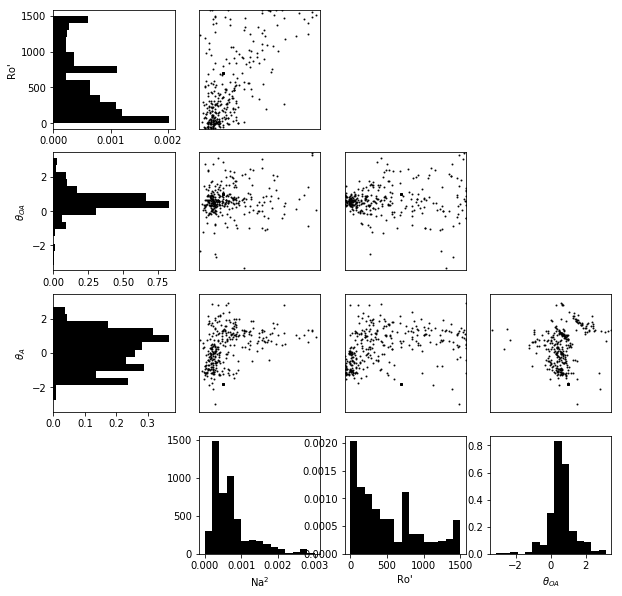

In [16]:
fig_location = '/Users/H/Documents/Tex/Reports/18-09-10_maps/'
# SCATTER THE SHIT OUT OF IT. 
# trade offs d5/geo
# Na2 Rop Ca Co ThOA ThA
t = 12
# plot trade off
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
f = plt.figure(figsize=[10,10])
# horizontal hists
plt.subplot(4,4,1)
plt.hist(inv_data_d[:,:,t,4].ravel(),
         range=[0,1500],bins=15,color='k',orientation='horizontal',normed=True,histtype='bar')
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(inv_data_d[:,:,t,6].ravel(),
         range=[-np.pi,np.pi],bins=15,color='k',orientation='horizontal',normed=True,histtype='bar')
plt.ylabel(r'$\theta_{OA}$')
plt.subplot(4,4,9)
plt.hist(inv_data_d[:,:,t,5].ravel(),
         range=[-np.pi,np.pi],bins=15,color='k',orientation='horizontal',normed=True,histtype='bar')
plt.ylabel(r'$\theta_{A}$')
alpha_u = 0.9
# x - Na y - Ro
plt.subplot(4,4,2)
plt.xlim([0,0.003])
plt.ylim([0,1500])
plt.xticks([])
plt.yticks([])
alpha_u = 0.9
plt.scatter(inv_data_d[:,:,t,3],inv_data_d[:,:,t,4],color='k',s=1,alpha=alpha_u)

# # x - Na y - thA
plt.subplot(4,4,6)
plt.xlim([0,0.003])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,3],inv_data_d[:,:,t,6],color='k',s=1,alpha=alpha_u)

# # x - Ro y - thA
plt.subplot(4,4,7)
plt.xlim([0,1500])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,4],inv_data_d[:,:,t,6],color='k',s=1,alpha=alpha_u)

# # x - Na y - thO
plt.subplot(4,4,10)
plt.xlim([0,0.003])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,3],inv_data_d[:,:,t,5],color='k',s=1,alpha=alpha_u)

# # x - Ro y - thO
plt.subplot(4,4,11)
plt.xlim([0,1500])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,4],inv_data_d[:,:,t,5],color='k',s=1,alpha=alpha_u)

plt.subplot(4,4,12)
plt.xlim([-np.pi,np.pi])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,6],inv_data_d[:,:,t,5],color='k',s=1,alpha=alpha_u)

plt.subplot(4,4,14)
plt.hist(inv_data_d[:,:,t,3].ravel(),
         range=[0,0.003],bins=15,color='k',orientation='vertical',normed=True,histtype='bar')
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(inv_data_d[:,:,t,4].ravel(),
         range=[0,1500],bins=15,color='k',orientation='vertical',normed=True,histtype='bar')
plt.xlabel('Ro\'')
plt.subplot(4,4,16)
plt.hist(inv_data_d[:,:,t,6].ravel(),
         range=[-np.pi,np.pi],bins=15,color='k',orientation='vertical',normed=True,histtype='bar')
plt.xlabel(r'$\theta_{OA}$')
# f.savefig(fig_location+'07_04_map_trade_off_PIOMAS.pdf',format='pdf',bbox_inches='tight')
plt.show()

20140704 20140808


/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less
/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeW

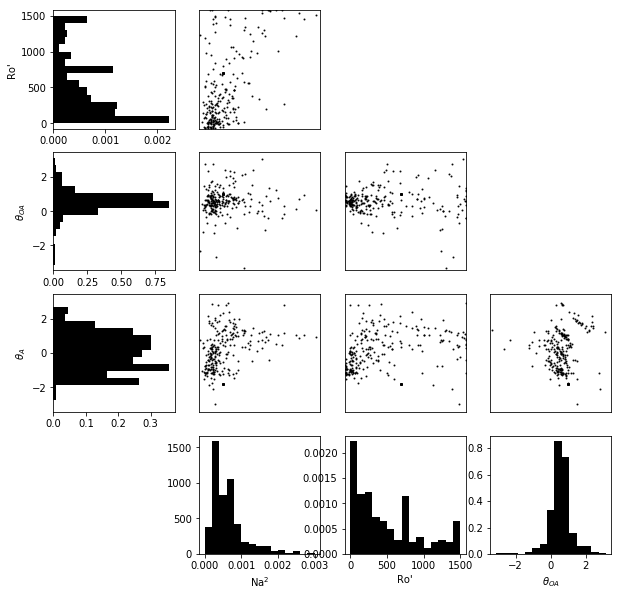

In [17]:
fig_location = '/Users/H/Documents/Tex/Reports/18-09-10_maps/'
# SCATTER THE SHIT OUT OF IT. 
# trade offs d5/geo
# Na2 Rop Ca Co ThOA ThA
t = 12
# plot trade off
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
f = plt.figure(figsize=[10,10])

index1 = t*day_strd+day_buff
index2 = index1+day_strd*nbals+n_days
time_use1 = time_start+datetime.timedelta(days = index1)
time_use2 = time_start+datetime.timedelta(days = index1+day_strd*nbals+n_days)
print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
    
infile = NSIDC_d+"nt_"+time_use1.strftime('%Y%m%d')+"_f17_v1.1_n.bin"
with open(infile, 'rb') as fr:
    hdr = fr.read(300)
    ice = np.fromfile(fr, dtype=np.uint8)

ice = ice.reshape(dimY,dimX)
ice = np.flipud(ice)
ice = ice / 250.
# ice[ice>0.95]=np.NaN
ice[ice<0.15]=np.NaN

x, y = map(lonsC, latsC)
#etc
conc_cont = griddata((x.ravel(), y.ravel()),ice.ravel(), (xptsG, yptsG), method='linear')


# horizontal hists
plt.subplot(4,4,1)
plt.hist(inv_data_d[:,:,t,4][conc_cont<0.95].ravel(),
         range=[0,1500],bins=15,color='k',orientation='horizontal',normed=True,histtype='bar')
plt.ylabel('Ro\'')
plt.subplot(4,4,5)
plt.hist(inv_data_d[:,:,t,6][conc_cont<0.95].ravel(),
         range=[-np.pi,np.pi],bins=15,color='k',orientation='horizontal',normed=True,histtype='bar')
plt.ylabel(r'$\theta_{OA}$')
plt.subplot(4,4,9)
plt.hist(inv_data_d[:,:,t,5][conc_cont<0.95].ravel(),
         range=[-np.pi,np.pi],bins=15,color='k',orientation='horizontal',normed=True,histtype='bar')
plt.ylabel(r'$\theta_{A}$')
alpha_u = 0.9
# x - Na y - Ro
plt.subplot(4,4,2)
plt.xlim([0,0.003])
plt.ylim([0,1500])
plt.xticks([])
plt.yticks([])
alpha_u = 0.9
plt.scatter(inv_data_d[:,:,t,3][conc_cont<0.95],inv_data_d[:,:,t,4][conc_cont<0.95],
            color='k',s=1,alpha=alpha_u)

# # x - Na y - thA
plt.subplot(4,4,6)
plt.xlim([0,0.003])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,3][conc_cont<0.95],inv_data_d[:,:,t,6][conc_cont<0.95],
            color='k',s=1,alpha=alpha_u)

# # x - Ro y - thA
plt.subplot(4,4,7)
plt.xlim([0,1500])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,4][conc_cont<0.95],inv_data_d[:,:,t,6][conc_cont<0.95],
            color='k',s=1,alpha=alpha_u)

# # x - Na y - thO
plt.subplot(4,4,10)
plt.xlim([0,0.003])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,3][conc_cont<0.95],inv_data_d[:,:,t,5][conc_cont<0.95],
            color='k',s=1,alpha=alpha_u)

# # x - Ro y - thO
plt.subplot(4,4,11)
plt.xlim([0,1500])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,4][conc_cont<0.95],inv_data_d[:,:,t,5][conc_cont<0.95],
            color='k',s=1,alpha=alpha_u)

plt.subplot(4,4,12)
plt.xlim([-np.pi,np.pi])
plt.ylim([-np.pi,np.pi])
plt.xticks([])
plt.yticks([])
plt.scatter(inv_data_d[:,:,t,6][conc_cont<0.95],inv_data_d[:,:,t,5][conc_cont<0.95],
            color='k',s=1,alpha=alpha_u)

plt.subplot(4,4,14)
plt.hist(inv_data_d[:,:,t,3][conc_cont<0.95].ravel(),
         range=[0,0.003],bins=15,color='k',orientation='vertical',normed=True,histtype='bar')
plt.xlabel(r'Na$^2$')
plt.subplot(4,4,15)
plt.hist(inv_data_d[:,:,t,4][conc_cont<0.95].ravel(),
         range=[0,1500],bins=15,color='k',orientation='vertical',normed=True,histtype='bar')
plt.xlabel('Ro\'')
plt.subplot(4,4,16)
plt.hist(inv_data_d[:,:,t,6][conc_cont<0.95].ravel(),
         range=[-np.pi,np.pi],bins=15,color='k',orientation='vertical',normed=True,histtype='bar')
plt.xlabel(r'$\theta_{OA}$')
# f.savefig(fig_location+'07_04_map_trade_off_PIOMAS.pdf',format='pdf',bbox_inches='tight')
plt.show()

20140704 20140808


/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less
/Users/H/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


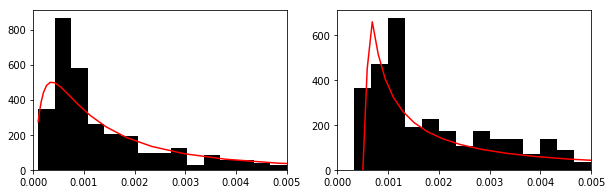

In [304]:
fig_location = '/Users/H/Documents/Tex/Reports/18-09-10_maps/'
# SCATTER THE SHIT OUT OF IT. 
# trade offs d5/geo
# Na2 Rop Ca Co ThOA ThA
t = 12
# plot trade off
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
f = plt.figure(figsize=[10,10])

index1 = t*day_strd+day_buff
index2 = index1+day_strd*nbals+n_days
time_use1 = time_start+datetime.timedelta(days = index1)
time_use2 = time_start+datetime.timedelta(days = index1+day_strd*nbals+n_days)
print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
    
infile = NSIDC_d+"nt_"+time_use1.strftime('%Y%m%d')+"_f17_v1.1_n.bin"
with open(infile, 'rb') as fr:
    hdr = fr.read(300)
    ice = np.fromfile(fr, dtype=np.uint8)

ice = ice.reshape(dimY,dimX)
ice = np.flipud(ice)
ice = ice / 250.
ice[ice>0.95]=np.NaN
ice[ice<0.05]=np.NaN

x, y = map(lonsC, latsC)
#etc
conc_cont = griddata((x.ravel(), y.ravel()),ice.ravel(), (xptsG, yptsG), method='linear')


# horizontal hists
# plt.subplot(3,2,1)
# plt.hist(inv_data_d[:,:,t,3][conc_cont<0.95].ravel(),
#          range=[0,0.0015],bins=10,color='k',normed=True,histtype='bar')
# plt.subplot(3,2,2)
# plt.hist(inv_data_d[:,:,t,4][conc_cont<0.95].ravel(),
#          range=[0,500],bins=10,color='k',normed=True,histtype='bar')
# plt.ylabel('Ro\'')
# plt.subplot(3,2,3)
# plt.hist(inv_data_d[:,:,t,6][conc_cont<0.95].ravel(),
#          range=[-np.pi/4,3*np.pi/4],bins=10,color='k',normed=True,histtype='bar')
# plt.ylabel(r'$\theta_{OA}$')
# plt.subplot(3,2,4)
# plt.hist(inv_data_d[:,:,t,5][conc_cont<0.95].ravel(),
#          range=[-3*np.pi/4,3*np.pi/4],bins=10,color='k',normed=True,histtype='bar')
# plt.ylabel(r'$\theta_{A}$')
ax = plt.subplot(3,2,5)
data = (inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4])*(freedrift.rhoi/freedrift.rhoa)
data = data[np.isfinite(conc_cont)]
data = data[np.isfinite(data)]
xp = np.logspace(-4 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data)
pdf = stats.lognorm.pdf(
    xp,shape, loc,scale)
ax.hist(data,range=[1e-4,5e-3],
        bins= 15,color='k',normed=True,histtype='bar')
ax.plot(xp,pdf,'-r')
ax.set_xbound([0,5e-3])
# ax.set_xscale("log")
# plt.plot((inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4])[conc_cont<0.95].ravel()*(freedrift.rhoi/freedrift.rhoa),
# plt.xlim([0,0.005])
# plt.hist(np.log((inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4])[conc_cont<0.95].ravel()*(freedrift.rhoi/freedrift.rhoa)),
#          range=[np.log(0.0001),np.log(0.1)],bins=10,color='k',normed=True,histtype='bar')
# plt.xticks(np.log([0.0001,0.001,0.01,0.1]),[0.0001,0.001,0.01,0.1])
# plt.ylabel(r'$\theta_{A}$')
ax = plt.subplot(3,2,6)
data = freedrift.rhoi/freedrift.rhoo/inv_data_d[:,:,t,4]
data = data[np.isfinite(conc_cont)]
data = data[np.isfinite(data)]
xp = np.logspace(-3.3 ,-2, num = 20)
shape, loc, scale = stats.lognorm.fit(data)
pdf = stats.lognorm.pdf(
    xp,shape, loc,scale)
ax.hist(data,range=[0e-4,5e-3],
        bins= 15,color='k',normed=True,histtype='bar')
ax.plot(xp,pdf,'-r')
ax.set_xbound([0,5e-3])
# plt.hist(np.log(freedrift.rhoi/freedrift.rhoo/(inv_data_d[:,:,t,4][np.isfinite(conc_cont)].ravel())),
#          range=[np.log(0.0001),np.log(0.1)],bins=10,color='k',normed=True,histtype='bar')
# plt.xticks(np.log([0.0001,0.001,0.01,0.1]),[0.0001,0.001,0.01,0.1])
# plt.hist(freedrift.rhoi/freedrift.rhoo/(inv_data_d[:,:,t,4][conc_cont<0.95].ravel()),
#          range=[0,0.02],bins=10,color='k',normed=True,histtype='bar')
# x - Na y - Ro
# f.savefig(fig_location+'07_04_map_trade_off_PIOMAS.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [202]:
data = ((inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4])*
           (freedrift.rhoi/freedrift.rhoa))
data = data[np.isfinite(conc_cont)]
data = data[np.isfinite(data)]

In [209]:
shape, loc, scale = stats.lognorm.fit(data)#,loc=1.0e-2)
print(shape, loc, scale )
xp = np.logspace(-4 ,-2, num = 15)
pdf = stats.lognorm.pdf(
    xp,shape, loc,scale)
pdf

1.11881506405 -1.15658094078e-05 0.00133167192167


array([ 274.18450634,  354.85585779,  429.16366202,  482.04273459,
        500.6725288 ,  479.43749764,  422.42716921,  342.01462077,
        254.24184809,  173.43347093,  108.53417111,   62.2974049 ,
         32.79456893,   15.83227367,    7.00951569])

In [145]:
np.shape(pdf)

(10,)

In [55]:
conc_filter = conc_cont
conc_filter[conc_filter>0.95] = np.NaN
conc_filter[np.isfinite(conc_filter)] = 1.0
np.shape(inv_data_d[:,:,t,3][np.isfinite(conc_filter)])

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(974,)

20140704 20140808


/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPat

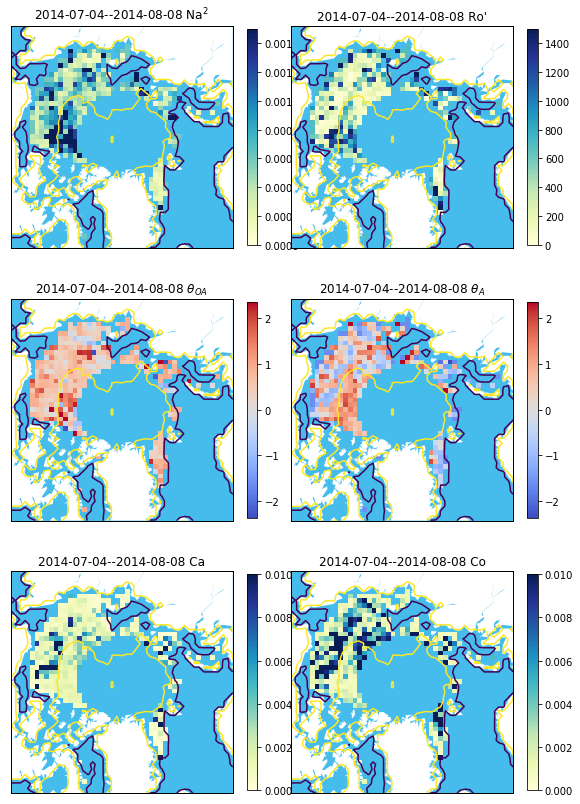

In [72]:
# here we go, oh yeh, maps!!
nbals = 5

# for t in range(invs_to_do_t):
for t in range(12,13):
    index1 = t*day_strd+day_buff
    index2 = index1+day_strd*nbals+n_days
    time_use1 = time_start+datetime.timedelta(days = index1)
    time_use2 = time_start+datetime.timedelta(days = index1+day_strd*nbals+n_days)
    print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
    
    infile = NSIDC_d+"nt_"+time_use1.strftime('%Y%m%d')+"_f17_v1.1_n.bin"
    with open(infile, 'rb') as fr:
        hdr = fr.read(300)
        ice = np.fromfile(fr, dtype=np.uint8)

    ice = ice.reshape(dimY,dimX)
    ice = np.flipud(ice)
    ice = ice / 250.
#     ice[ice>0.95]=np.NaN
# ice[ice<0.001]=np.NaN

    x, y = map(lonsC, latsC)
#etc
    conc_cont = griddata((x.ravel(), y.ravel()),ice.ravel(), (xptsG, yptsG), method='linear')
    f = plt.figure(figsize=[10,15])
    # conc first for contours
    
    plt.subplot(3,2,1)
    img = map.imshow(inv_data_d[:,:,t,3],
#     img = map.imshow((inv_data_d[:,:,t,3]*(conc_filter)), 
                     interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.0015)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' Na$^2$')

    plt.subplot(3,2,2)
    img = map.imshow(inv_data_d[:,:,t,4], interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 1500)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Ro\'')

    plt.subplot(3,2,3)
    img = map.imshow(inv_data_d[:,:,t,6], interpolation='none', cmap='coolwarm',vmin = -3*np.pi/4,vmax = 3*np.pi/4)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' $\theta_{OA}$')

    plt.subplot(3,2,4)
    img = map.imshow(inv_data_d[:,:,t,5], interpolation='none', cmap='coolwarm',vmin = -3*np.pi/4,vmax = 3*np.pi/4)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' $\theta_{A}$')
    
    plt.subplot(3,2,5)
    img = map.imshow(inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4]*(freedrift.rhoi/freedrift.rhoa), 
                     interpolation='none', cmap='YlGnBu',vmin=0.0,vmax=0.01)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Ca')

    plt.subplot(3,2,6)
    img = map.imshow(freedrift.rhoi/freedrift.rhoo/inv_data_d[:,:,t,4], 
                     interpolation='none', cmap='YlGnBu',vmin=0.0,vmax=0.01)
    plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Co')
    
    plt.subplots_adjust(hspace = 0.01,wspace=0.01)
#     f.savefig(fig_location+'sat_inversion_'+time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+'_PIOMAS.pdf',
#               format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
cbar.ax.s

20140704 20140808


/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPat

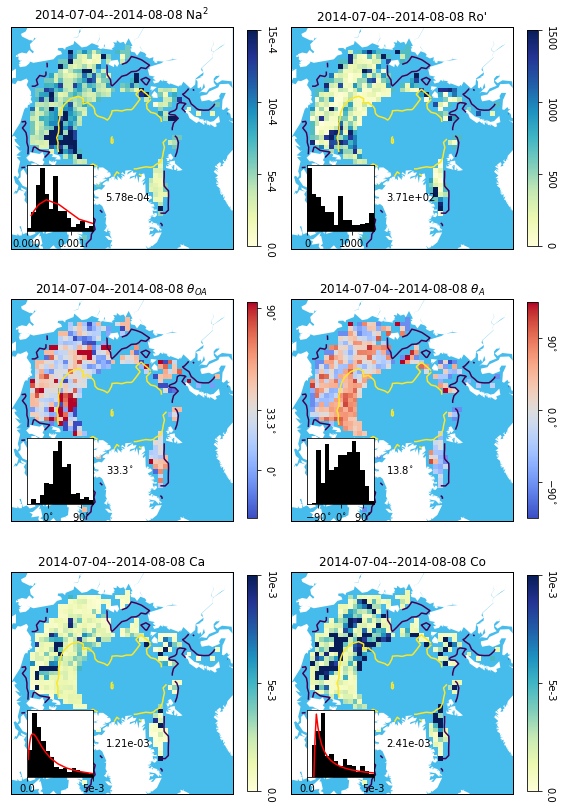

In [22]:
# here we go, oh yeh, maps!!
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# for t in range(invs_to_do_t):
nbals = 5
for t in range(12,13):
    index1 = t*day_strd+day_buff
    index2 = index1+day_strd*nbals+n_days
    time_use1 = time_start+datetime.timedelta(days = index1)
    time_use2 = time_start+datetime.timedelta(days = index1+day_strd*nbals+n_days)
    print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
    
    infile = NSIDC_d+"nt_"+time_use1.strftime('%Y%m%d')+"_f17_v1.1_n.bin"
    with open(infile, 'rb') as fr:
        hdr = fr.read(300)
        ice = np.fromfile(fr, dtype=np.uint8)

    ice = ice.reshape(dimY,dimX)
    ice = np.flipud(ice)
    ice = ice / 250.
    ice[ice>1.0]=np.NaN
# ice[ice<0.001]=np.NaN

    x, y = map(lonsC, latsC)
#etc
    conc_cont = griddata((x.ravel(), y.ravel()),ice.ravel(), (xptsG, yptsG), method='linear')
    f = plt.figure(figsize=[10,15])
    # conc first for contours
    
    ax = plt.subplot(3,2,1)
#     ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    img = map.imshow(inv_data_d[:,:,t,3], interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.0015)
    cbar = plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' Na$^2$')
    
#     in_axes = inset_axes(ax,
# #                     width="30%",                     # inchwidth="30%"
# #                     height="30%",                    # inch
#                     width=100,
#                     height=100,
# #                     bbox_transform=ax.transData, # data coordinates
#                     bbox_to_anchor=(0.0,0.0),
# #                     bbox_to_anchor=((0.0,0.0,1.6,1.6)),    # data coordinates
#                     loc=3)                       # loc=lower left corner
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = inv_data_d[:,:,t,3]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
    xp = np.logspace(-4 ,-1, num = 15)
    shape, loc, scale = stats.lognorm.fit(data)
    pdf = stats.lognorm.pdf(
        xp,shape, loc,scale)
    axins.hist(data,range=[0e-4,0.0015],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.2e}'.format(np.median(data)),color = 'k')
    axins.plot(xp,pdf,'-r')
    axins.set_xbound([0,0.0015])
    axins.set_yticks([])
    cbar.set_ticks([0.0,0.0005,0.001,0.0015])
    cbar.ax.set_yticklabels(['0.0','5e-4','10e-4','15e-4'],rotation = -90)



    ax = plt.subplot(3,2,2)
    img = map.imshow(inv_data_d[:,:,t,4], interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 1500)
    cbar = plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Ro\'')

    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = inv_data_d[:,:,t,4]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
    xp = np.logspace(0 ,5, num = 35)
    shape, loc, scale = stats.lognorm.fit(data,loc=-0.1)
    pdf = stats.lognorm.pdf(
        xp,shape, loc,scale)
    axins.hist(data,range=[0e-4,1500],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.2e}'.format(np.median(data)),color = 'k')
#     axins.plot(xp,pdf,'-r')
    axins.set_xbound([0,1500])
    axins.set_yticks([])
    cbar.set_ticks([0.0,5e2,10e2,15e2])
    cbar.ax.set_yticklabels(['0','500','1000','1500'],rotation = -90)
    
    ax = plt.subplot(3,2,3)
    mid = np.deg2rad(33.3)
    img = map.imshow(inv_data_d[:,:,t,6], interpolation='none', cmap='coolwarm',vmin = mid-np.pi/3,vmax = mid+np.pi/3)
    cbar = plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' $\theta_{OA}$')
    
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = inv_data_d[:,:,t,6]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
#     xp = np.logspace(0 ,5, num = 35)
#     shape, loc, scale = stats.lognorm.fit(data,loc=-0.1)
#     pdf = stats.lognorm.pdf(
#         xp,shape, loc,scale)
    axins.hist(data,range=[-np.pi/4, 3*np.pi/4],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.1f}'.format(np.rad2deg(np.median(data)))+r'$^{\circ}$',color = 'k')
    axins.set_xticks([0.0,np.pi/2])
    axins.set_xticklabels([r'$0^{\circ}$',r'$90^{\circ}$'])
    axins.set_xbound([mid-np.pi/2, mid+np.pi/2])
    axins.set_yticks([])
    cbar.set_ticks([0.0,mid,np.pi/2])
    cbar.ax.set_yticklabels([r'$0^{\circ}$',r'$33.3^{\circ}$',r'$90^{\circ}$'],rotation = -90)

    ax = plt.subplot(3,2,4)
    img = map.imshow(inv_data_d[:,:,t,5], interpolation='none', cmap='coolwarm',vmin = -3*np.pi/4,vmax = 3*np.pi/4)
    cbar = plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' $\theta_{A}$')
    
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = inv_data_d[:,:,t,5]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
#     xp = np.logspace(0 ,5, num = 35)
#     shape, loc, scale = stats.lognorm.fit(data,loc=-0.1)
#     pdf = stats.lognorm.pdf(
#         xp,shape, loc,scale)
    axins.hist(data,range=[-3*np.pi/4, 3*np.pi/4],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.1f}'.format(np.rad2deg(np.median(data)))+r'$^{\circ}$',color = 'k')
    axins.set_xticks([-np.pi/2,0.0,np.pi/2])
    axins.set_xticklabels([r'$-90^{\circ}$',r'$0^{\circ}$',r'$90^{\circ}$'])
    axins.set_xbound([-3*np.pi/4, 3*np.pi/4])
    axins.set_yticks([])
    cbar.set_ticks([-np.pi/2,0.0,np.pi/2])
    cbar.ax.set_yticklabels([r'$-90^{\circ}$',r'$0.0^{\circ}$',r'$90^{\circ}$'],rotation = -90)
    
    ax = plt.subplot(3,2,5)
    img = map.imshow(inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4]*(freedrift.rhoi/freedrift.rhoa), 
                     interpolation='none', cmap='YlGnBu',vmin=0.0,vmax=0.01)
    cbar = plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Ca')
    
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = (inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4])*(freedrift.rhoi/freedrift.rhoa)
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
    xp = np.logspace(-4 ,-2, num = 20)
    shape, loc, scale = stats.lognorm.fit(data)
    pdf = stats.lognorm.pdf(
        xp,shape, loc,scale)
    axins.hist(data,range=[1e-4,5e-3],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.2e}'.format(np.median(data)),color = 'k')
    axins.plot(xp,pdf,'-r')
    axins.set_xbound([0,5e-3])
    axins.set_xticks([0.0,5e-3])
    axins.set_xticklabels(['0.0','5e-3'])
    axins.set_yticks([])
    cbar.set_ticks([0.0,5e-3,0.01])
    cbar.ax.set_yticklabels(['0.0','5e-3','10e-3'],rotation = -90)

    ax = plt.subplot(3,2,6)
    img = map.imshow(freedrift.rhoi/freedrift.rhoo/inv_data_d[:,:,t,4], 
                     interpolation='none', cmap='YlGnBu',vmin=0.0,vmax=0.01)
    cbar = plt.colorbar(shrink=0.8)
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95])
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Co')
    
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    
    data = freedrift.rhoi/freedrift.rhoo/inv_data_d[:,:,t,4]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
    xp = np.logspace(-3.3 ,-2, num = 20)
    shape, loc, scale = stats.lognorm.fit(data)
    pdf = stats.lognorm.pdf(
        xp,shape, loc,scale)
    axins.hist(data,range=[0e-4,5e-3],
            bins= 15,color='k',normed=True,histtype='bar')
#     axins.text(2e-3,np.max(pdf),'{0:.2e}'.format(np.median(data)),color = 'k')
    ax.text(2e6,1e6,'{0:.2e}'.format(np.median(data)),color = 'k')
    axins.plot(xp,pdf,'-r')
    axins.set_xbound([0,5e-3])
    axins.set_xticks([0.0,5e-3])
    axins.set_xticklabels(['0.0','5e-3'])
    axins.set_yticks([])
    cbar.set_ticks([0.0,5e-3,0.01])
    cbar.ax.set_yticklabels(['0.0','5e-3','10e-3'],rotation = -90)
    
    plt.subplots_adjust(hspace = 0.01,wspace=0.01)
#     f.savefig(fig_location+'sat_inversion_'+time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+'_PIOMAS.pdf',
#               format='pdf',bbox_inches='tight')
plt.show()

In [28]:
t =12
data = (inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4])*(freedrift.rhoi/freedrift.rhoa)
data = data[np.isfinite(conc_cont)]
data = data[np.isfinite(data)]
print(np.percentile(data,[25,50,75])*1e3)
data = freedrift.rhoi/freedrift.rhoo/inv_data_d[:,:,t,4]
data = data[np.isfinite(conc_cont)]
data = data[np.isfinite(data)]
print(np.percentile(data,[25,50,75])*1e3)

[ 0.64510459  1.21236085  2.53759556]
[ 1.27622714  2.4096258   6.76812822]


20140704 20140808


/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/H/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes

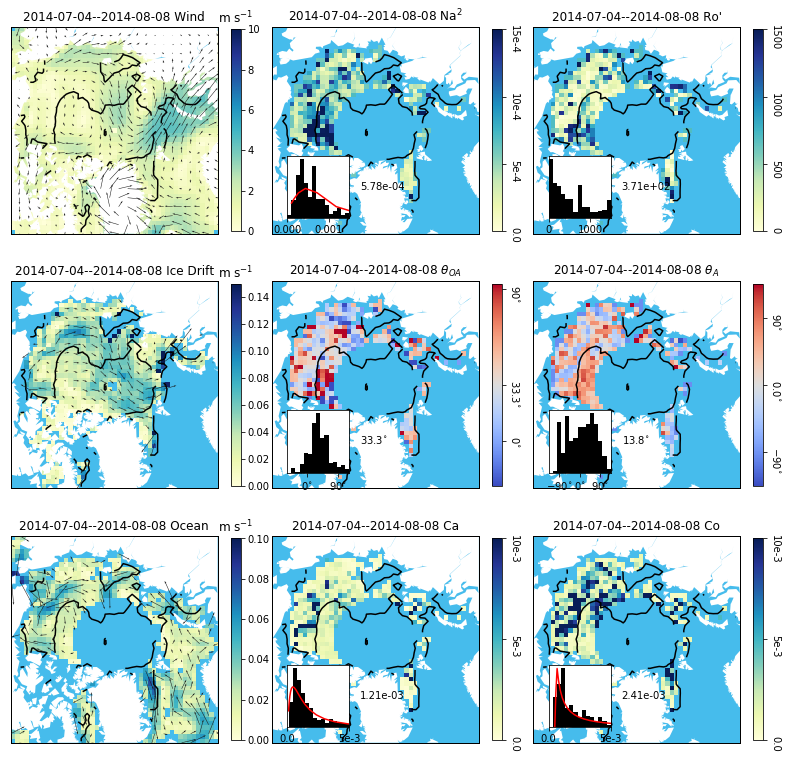

In [39]:
# here we go, oh yeh, maps!!
fig_location = '/Users/H/Documents/Tex/Papers/Inverse_paper/Final_figures/'
# for t in range(invs_to_do_t):
for t in range(12,13):
    index1 = t*day_strd+day_buff
    index2 = index1+day_strd*nbals+n_days
    time_use1 = time_start+datetime.timedelta(days = index1)
    time_use2 = time_start+datetime.timedelta(days = index1+day_strd*nbals+n_days)
    print(time_use1.strftime('%Y%m%d'),time_use2.strftime('%Y%m%d')) 
    
    infile = NSIDC_d+"nt_"+time_use1.strftime('%Y%m%d')+"_f17_v1.1_n.bin"
    with open(infile, 'rb') as fr:
        hdr = fr.read(300)
        ice = np.fromfile(fr, dtype=np.uint8)

    ice = ice.reshape(dimY,dimX)
    ice = np.flipud(ice)
    ice = ice / 250.
    ice[ice>1.0]=np.NaN
# ice[ice<0.001]=np.NaN

    x, y = map(lonsC, latsC)
#etc
    conc_cont = griddata((x.ravel(), y.ravel()),ice.ravel(), (xptsG, yptsG), method='linear')
    f = plt.figure(figsize=[14,14])
    # conc first for contours
    # ERA input - what is the data range???
    # 25 days on from the first data
    # first day is index1 
    # index end is index1+day_strd*nbals+n_days
    ax = plt.subplot(3,3,1)
#     ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    xvelG = np.nanmean(ERA_grid_array[:,:,0,index1:index1+day_strd*nbals+n_days],2)
    yvelG = np.nanmean(ERA_grid_array[:,:,1,index1:index1+day_strd*nbals+n_days],2)
    speed = np.hypot(xvelG,yvelG)
    img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 10.0 )
    Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                    units='inches',scale=20,  color='0.1', zorder=5)
    cbar = plt.colorbar(shrink=0.8)
    cbar.ax.set_title(r'm s$^{-1}$')
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' Wind')
    
    ax = plt.subplot(3,3,4)
#     ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    xvelG = np.nanmean(dft_grid_array[:,:,0,index1:index1+day_strd*nbals+n_days],2)
    yvelG = np.nanmean(dft_grid_array[:,:,1,index1:index1+day_strd*nbals+n_days],2)
    speed = np.hypot(xvelG,yvelG)
    img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.15 )
    Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                    units='inches',scale=0.5,  color='0.1', zorder=5)
    cbar = plt.colorbar(shrink=0.8)
    cbar.ax.set_title(r'm s$^{-1}$')
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' Ice Drift')
    
    ax = plt.subplot(3,3,7)
#     ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    xvelG = np.nanmean(GEO_grid_array[:,:,0,index1:index1+day_strd*nbals+n_days],2)
    yvelG = np.nanmean(GEO_grid_array[:,:,1,index1:index1+day_strd*nbals+n_days],2)
    speed = np.hypot(xvelG,yvelG)
    img = map.imshow(speed, interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.1 )
    Q1 = map.quiver(xptsG[::res, ::res], yptsG[::res, ::res], xvelG[::res, ::res], yvelG[::res, ::res], 
                    units='inches',scale=0.2,  color='0.1', zorder=5)
    cbar = plt.colorbar(shrink=0.8)
    cbar.ax.set_title(r'm s$^{-1}$')
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' Ocean')
    
    ax = plt.subplot(3,3,2)
#     ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    img = map.imshow(inv_data_d[:,:,t,3], interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 0.0015)
    cbar = plt.colorbar(shrink=0.8)
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' Na$^2$')
    
#     in_axes = inset_axes(ax,
# #                     width="30%",                     # inchwidth="30%"
# #                     height="30%",                    # inch
#                     width=100,
#                     height=100,
# #                     bbox_transform=ax.transData, # data coordinates
#                     bbox_to_anchor=(0.0,0.0),
# #                     bbox_to_anchor=((0.0,0.0,1.6,1.6)),    # data coordinates
#                     loc=3)                       # loc=lower left corner
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = inv_data_d[:,:,t,3]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
    xp = np.logspace(-4 ,-1, num = 15)
    shape, loc, scale = stats.lognorm.fit(data)
    pdf = stats.lognorm.pdf(
        xp,shape, loc,scale)
    axins.hist(data,range=[0e-4,0.0015],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.2e}'.format(np.median(data)),color = 'k')
    axins.plot(xp,pdf,'-r')
    axins.set_xbound([0,0.0015])
    axins.set_yticks([])
    cbar.set_ticks([0.0,0.0005,0.001,0.0015])
    cbar.ax.set_yticklabels(['0.0','5e-4','10e-4','15e-4'],rotation = -90)



    ax = plt.subplot(3,3,3)
    img = map.imshow(inv_data_d[:,:,t,4], interpolation='none', cmap='YlGnBu',vmin = 0.0,vmax = 1500)
    cbar = plt.colorbar(shrink=0.8)
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Ro\'')

    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = inv_data_d[:,:,t,4]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
    xp = np.logspace(0 ,5, num = 35)
    shape, loc, scale = stats.lognorm.fit(data,loc=-0.1)
    pdf = stats.lognorm.pdf(
        xp,shape, loc,scale)
    axins.hist(data,range=[0e-4,1500],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.2e}'.format(np.median(data)),color = 'k')
#     axins.plot(xp,pdf,'-r')
    axins.set_xbound([0,1500])
    axins.set_yticks([])
    cbar.set_ticks([0.0,5e2,10e2,15e2])
    cbar.ax.set_yticklabels(['0','500','1000','1500'],rotation = -90)
    
    ax = plt.subplot(3,3,5)
    mid = np.deg2rad(33.3)
    img = map.imshow(inv_data_d[:,:,t,6], interpolation='none', cmap='coolwarm',vmin = mid-np.pi/3,vmax = mid+np.pi/3)
    cbar = plt.colorbar(shrink=0.8)
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' $\theta_{OA}$')
    
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = inv_data_d[:,:,t,6]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
#     xp = np.logspace(0 ,5, num = 35)
#     shape, loc, scale = stats.lognorm.fit(data,loc=-0.1)
#     pdf = stats.lognorm.pdf(
#         xp,shape, loc,scale)
    axins.hist(data,range=[-np.pi/4, 3*np.pi/4],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.1f}'.format(np.rad2deg(np.median(data)))+r'$^{\circ}$',color = 'k')
    axins.set_xticks([0.0,np.pi/2])
    axins.set_xticklabels([r'$0^{\circ}$',r'$90^{\circ}$'])
    axins.set_xbound([mid-np.pi/2, mid+np.pi/2])
    axins.set_yticks([])
    cbar.set_ticks([0.0,mid,np.pi/2])
    cbar.ax.set_yticklabels([r'$0^{\circ}$',r'$33.3^{\circ}$',r'$90^{\circ}$'],rotation = -90)

    ax = plt.subplot(3,3,6)
    img = map.imshow(inv_data_d[:,:,t,5], interpolation='none', cmap='coolwarm',vmin = -3*np.pi/4,vmax = 3*np.pi/4)
    cbar = plt.colorbar(shrink=0.8)
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+r' $\theta_{A}$')
    
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = inv_data_d[:,:,t,5]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
#     xp = np.logspace(0 ,5, num = 35)
#     shape, loc, scale = stats.lognorm.fit(data,loc=-0.1)
#     pdf = stats.lognorm.pdf(
#         xp,shape, loc,scale)
    axins.hist(data,range=[-3*np.pi/4, 3*np.pi/4],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.1f}'.format(np.rad2deg(np.median(data)))+r'$^{\circ}$',color = 'k')
    axins.set_xticks([-np.pi/2,0.0,np.pi/2])
    axins.set_xticklabels([r'$-90^{\circ}$',r'$0^{\circ}$',r'$90^{\circ}$'])
    axins.set_xbound([-3*np.pi/4, 3*np.pi/4])
    axins.set_yticks([])
    cbar.set_ticks([-np.pi/2,0.0,np.pi/2])
    cbar.ax.set_yticklabels([r'$-90^{\circ}$',r'$0.0^{\circ}$',r'$90^{\circ}$'],rotation = -90)
    
    ax = plt.subplot(3,3,8)
    img = map.imshow(inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4]*(freedrift.rhoi/freedrift.rhoa), 
                     interpolation='none', cmap='YlGnBu',vmin=0.0,vmax=0.01)
    cbar = plt.colorbar(shrink=0.8)
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Ca')
    
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    data = (inv_data_d[:,:,t,3]/inv_data_d[:,:,t,4])*(freedrift.rhoi/freedrift.rhoa)
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
    xp = np.logspace(-4 ,-2, num = 20)
    shape, loc, scale = stats.lognorm.fit(data)
    pdf = stats.lognorm.pdf(
        xp,shape, loc,scale)
    axins.hist(data,range=[1e-4,5e-3],
            bins= 15,color='k',normed=True,histtype='bar')
    ax.text(2e6,1e6,'{0:.2e}'.format(np.median(data)),color = 'k')
    axins.plot(xp,pdf,'-r')
    axins.set_xbound([0,5e-3])
    axins.set_xticks([0.0,5e-3])
    axins.set_xticklabels(['0.0','5e-3'])
    axins.set_yticks([])
    cbar.set_ticks([0.0,5e-3,0.01])
    cbar.ax.set_yticklabels(['0.0','5e-3','10e-3'],rotation = -90)

    ax = plt.subplot(3,3,9)
    img = map.imshow(freedrift.rhoi/freedrift.rhoo/inv_data_d[:,:,t,4], 
                     interpolation='none', cmap='YlGnBu',vmin=0.0,vmax=0.01)
    cbar = plt.colorbar(shrink=0.8)
    conmap = mcolors.ListedColormap(['black'])
    map.contour(xptsG,yptsG,conc_cont,[0.15,0.95],cmap = conmap)
    map.drawmapboundary(fill_color='#46bcec')
    map.fillcontinents(color = 'white',lake_color='#46bcec')
    plt.title(time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+' Co')
    
    axins = inset_axes(ax, width="100%", height="100%", loc='upper left',
                   bbox_to_anchor=(0.05,0.1,.3,.3), bbox_transform=ax.transAxes)
    
    data = freedrift.rhoi/freedrift.rhoo/inv_data_d[:,:,t,4]
    data = data[np.isfinite(conc_cont)]
    data = data[np.isfinite(data)]
    xp = np.logspace(-3.3 ,-2, num = 20)
    shape, loc, scale = stats.lognorm.fit(data)
    pdf = stats.lognorm.pdf(
        xp,shape, loc,scale)
    axins.hist(data,range=[0e-4,5e-3],
            bins= 15,color='k',normed=True,histtype='bar')
#     axins.text(2e-3,np.max(pdf),'{0:.2e}'.format(np.median(data)),color = 'k')
    ax.text(2e6,1e6,'{0:.2e}'.format(np.median(data)),color = 'k')
    axins.plot(xp,pdf,'-r')
    axins.set_xbound([0,5e-3])
    axins.set_xticks([0.0,5e-3])
    axins.set_xticklabels(['0.0','5e-3'])
    axins.set_yticks([])
    cbar.set_ticks([0.0,5e-3,0.01])
    cbar.ax.set_yticklabels(['0.0','5e-3','10e-3'],rotation = -90)
    
    plt.subplots_adjust(hspace = 0.01,wspace=0.01)
#     f.savefig(fig_location+'sat_inversion+data'+time_use1.strftime('%Y-%m-%d')+'--'+time_use2.strftime('%Y-%m-%d')+'_PIOMAS.pdf',
#               format='pdf',bbox_inches='tight')
plt.show()

In [112]:
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_run_i_o_w_a/'
na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_i_o_O-A/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_run_i_o_w_a_thAC/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo/'
# na_location = '/Users/H/INVERSE/Sylvia_data/NA_setup/NA_geo_thAC/'
# open na.in
# Open file
f = open(na_location+'/na.in', 'r')

# Read and ignore header lines
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()

# Loop over lines and extract variables of interest
# read p1
columns1 = f.readline()
var = columns1.split()[0]
c1_len = len(var)
# its = int(var)
# read p2
columns2 = f.readline()
var = columns2.split()[0]
c2_len = len(var)
# it1 = int(var)
# read p3
columns3 = f.readline()
var = columns3.split()[0]
c3_len = len(var)
# itn = int(var)
# read p4
columns4 = f.readline()
var = columns4.split()[0]
c4_len = len(var)
# res = int(var)

tail1 = f.readline()
tail2 = f.readline()
tail3 = f.readline()
tail4 = f.readline()
tail5 = f.readline()

f.close()

its = 15
it1 = 200
itn = 400
res = 20

# write na.in
# Open file
f = open(location+'/na.in', 'w')

# write and ignore header lines
f.writelines(header1)
f.writelines(header2)
f.writelines(header3)
f.writelines(header4)

# write its
f.writelines(str(its)+columns1[c1_len:-1]+'\n')
# write it1
f.writelines(str(it1)+columns2[c2_len:-1]+'\n')
# write it1
f.writelines(str(itn)+columns3[c3_len:-1]+'\n')
# write it1
f.writelines(str(res)+columns4[c4_len:-1]+'\n')

f.writelines(tail1)
f.writelines(tail2)
f.writelines(tail3)
f.writelines(tail4)
f.writelines(tail5)

f.close()

In [110]:
# constants and ranges
nansen_use = 0.022**2
# nansen_use = 3.3e-4
rossby_use = 500
# rossby_use = 162
n2a_min = nansen_use*1e-3
n2a_max = nansen_use*8e0
# n2a_min = nansen_use*9e-1
# n2a_max = nansen_use*11e-1
rop_min = rossby_use*1e-3
rop_max = rossby_use*3e0
# rop_min = rossby_use*9e-1
# rop_max = rossby_use*11e-1
print(n2a_min, np.sqrt(nansen_use), nansen_use, n2a_max)
print(rop_min, rossby_use, rop_max)
# general inv parameters
rhoa = 1.25 
rhoi = 917.0 
rhoo = 1026.0 

Ca_min = 1.0e-6
Ca_max = 2.0e-3
Co_min = 1.0e-3
Co_max = 6.0e-2

# invert for thO and thA-thO
# these replace for thO
thO_min = np.deg2rad(-179)
thO_max = np.deg2rad( 180)
# these replace for thA-thO
thAO_min = np.deg2rad(-179)
thAO_max = np.deg2rad( 179)

# constant thetaA if needed
thAC = np.rad2deg(0)


4.839999999999999e-07 0.022 0.00048399999999999995 0.0038719999999999996
0.5 500 1500.0


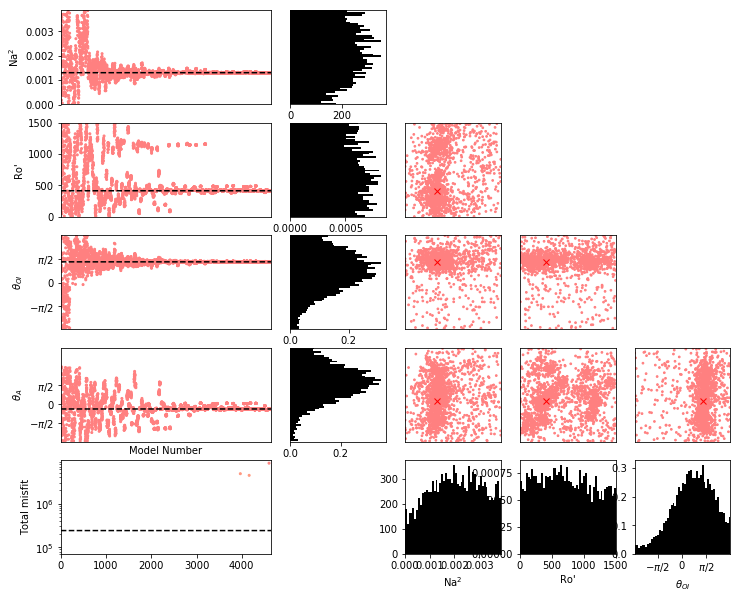

In [131]:
big_c = np.int(128*(np.log(misfit_max) - np.log([misfit_cut]))/(np.log(misfit_cut) - np.log([misfit_min])))
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
# colors1 = plt.cm.YlGnBu_r(np.linspace(0., 1, 128))
colors2 = plt.cm.autumn_r(np.linspace(0, 1, big_c))
# colors = np.vstack((colors1, colors2))
colors = np.vstack((colors1,1-(1-colors2)*0.5))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
# plt.imshow([colors], extent=[0, 10, 0, 1])
# plt.xticks([])
# plt.yticks([])
# plt.show()

# plot misfit
# cmin = 1e-10
# cmax = 1e2
no_bins = 50
cmin = misfit_min
# cmin = 1e-4
cmax = misfit_max
f=plt.figure(figsize=[12,10])
plt.subplot2grid([5,6],[0,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['Na'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Na'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'Na$^2$')
plt.xticks([])
# plt.savefig('misfit_all_100%.pdf')
plt.subplot2grid([5,6],[1,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['Ro'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Ro\'')
plt.xticks([])
plt.subplot2grid([5,6],[2,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thA-O'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{OI}$')
plt.yticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
plt.xticks([])
plt.subplot2grid([5,6],[3,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['thO'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[data_NA['thO'][misfit_min_no] for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
plt.ylabel(r'$\theta_{A}$')
plt.yticks([0,np.pi/2,np.pi,3*np.pi/2],[0,r'$\pi /2$',r'$\pi $',r'$3\pi /2$'])
plt.yticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
plt.xlabel('Model Number')
plt.xticks([])

plt.subplot2grid([5,6],[4,0],colspan=2)
plt.scatter(data_NA['number'],data_NA['misfit'],c=np.log(data_NA['misfit']),s=4,cmap=mymap)
plt.plot(data_NA['number'],[misfit_cut for j in range(data_NA['number'][-1])],'--k')
plt.xlim([0,0.75*data_NA['number'][-1]])
plt.yscale('log')
plt.ylim([cmin,np.max(data_NA['misfit'])])
plt.ylim([cmin,cmax])
plt.clim(np.log([cmin,cmax]))
plt.ylabel('Total misfit')

plt.subplot2grid([5,6],[0,2])
plt.hist(data_bayes[:,0],bins=no_bins,color='k',orientation='horizontal',normed='true')
# plt.axhline(np.mean(data_bayes[:,0]),color='r')
# plt.axhline(inv_data_d[day_start-first_day,28],color='g')
# plt.axhline(inv_data_d[day_start-first_day,29],color='r')
# plt.axhline(inv_data_d[day_start-first_day,30],color='g')
plt.ylim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
# plt.ylabel(r'Na$^2$')
plt.yticks([])
plt.subplot2grid([5,6],[1,2])
plt.hist(data_bayes[:,1],bins=no_bins,color='k',orientation='horizontal',normed='true')
# plt.axhline(np.mean(data_bayes[:,1]),color='r')
# plt.axhline(inv_data_d[day_start-first_day,31],color='g')
# plt.axhline(inv_data_d[day_start-first_day,32],color='r')
# plt.axhline(inv_data_d[day_start-first_day,33],color='g')
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
# plt.ylabel('Ro\'')
plt.yticks([])
plt.subplot2grid([5,6],[2,2])
plt.hist(data_bayes[:,3],bins=no_bins,color='k',orientation='horizontal',normed='true')
# plt.axhline(np.mean(data_bayes[:,3]),color='r')
# plt.axhline(inv_data_d[day_start-first_day,37],color='g')
# plt.axhline(inv_data_d[day_start-first_day,38],color='r')
# plt.axhline(inv_data_d[day_start-first_day,39],color='g')
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
# plt.ylabel(r'$\theta_{OI}$')
plt.yticks([])
plt.subplot2grid([5,6],[3,2])
plt.hist(data_bayes[:,2],bins=no_bins,color='k',orientation='horizontal',normed='true')
# plt.axhline(np.mean(data_bayes[:,2]),color='r')
# plt.axhline(inv_data_d[day_start-first_day,34],color='g')
# plt.axhline(inv_data_d[day_start-first_day,35],color='r')
# plt.axhline(inv_data_d[day_start-first_day,36],color='g')
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.yticks([])
# plt.ylabel(r'$\theta_{A}$')
# plt.yticks([])
# x - Na y - Ro

# plot trade off
# th1 = ThetaO
# th2 = ThetaA - ThetaO
# x - Na y - Ro
# f = plt.figure(figsize=[10,10])
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])#*0.1
# cmax = 1e7
# cmin = np.min(data_NA['misfit'])
# cmin = 1e-4
# cmax = np.max(data_NA['misfit'])
# horizontal hists
plt.subplot2grid([5,6],[1,3])
# plt.subplot(4,4,1)
plt.scatter(data_NA['Na'],data_NA['Ro'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.clim(np.log([cmin,cmax]))
plt.plot(data_NA['Na'][misfit_min_no],data_NA['Ro'][misfit_min_no],'xr')
plt.xticks([])
plt.yticks([])
# # x - Na y - thA
# plt.subplot(4,4,6)
plt.subplot2grid([5,6],[2,3])
plt.scatter(data_NA['Na'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
plt.xticks([])
plt.yticks([])
# # plt.ylabel('thA-O')
# # plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th1 for i in [1,1]],'--k')
# # plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
# # x - Ro y - thA
plt.subplot2grid([5,6],[2,4])
# plt.subplot(4,4,7)
plt.scatter(data_NA['Ro'],data_NA['thA-O'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.clim(np.log([cmin,cmax]))
# # plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th1 for i in [1,1]],'--k')
# # plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thA-O'][misfit_min_no],'xr')
plt.xticks([])
plt.yticks([])
# # x - Na y - thO
# plt.subplot(4,4,10)
plt.subplot2grid([5,6],[3,3])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['Na'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# # plt.ylabel('thO')
# # plt.plot([np.min(data_NA['Na']),np.max(data_NA['Na'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*nansen_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Na'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# # x - Ro y - thO
# plt.subplot(4,4,11)
plt.subplot2grid([5,6],[3,4])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['Ro'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# # plt.plot([np.min(data_NA['Ro']),np.max(data_NA['Ro'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*rossby_use for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['Ro'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# # x - thA y - thO
# plt.subplot(4,4,12)
plt.subplot2grid([5,6],[3,5])
plt.xticks([])
plt.yticks([])
plt.scatter(data_NA['thA-O'],data_NA['thO'],c=np.log(data_NA['misfit']),s=3,cmap=mymap)
plt.xlim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.ylim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
plt.clim(np.log([cmin,cmax]))
# # plt.plot([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])],[i*th2 for i in [1,1]],'--k')
# # plt.plot([i*th1 for i in [1,1]],[np.min(data_NA['thO']),np.max(data_NA['thO'])],'--k')
plt.plot(data_NA['thA-O'][misfit_min_no],data_NA['thO'][misfit_min_no],'xr')
# # bottom row histograms
# plt.subplot(4,4,14)
plt.subplot2grid([5,6],[4,3])
plt.hist(data_bayes[:,0],bins=no_bins,color='k',normed='true')
# plt.axvline(np.mean(data_bayes[:,0]),color='r')
# plt.axvline(inv_data_d[day_start-first_day,28],color='g')
# plt.axvline(inv_data_d[day_start-first_day,29],color='r')
# plt.axvline(inv_data_d[day_start-first_day,30],color='g')
plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
plt.xlabel(r'Na$^2$')
# plt.subplot(4,4,15)
plt.subplot2grid([5,6],[4,4])
plt.hist(data_bayes[:,1],bins=no_bins,color='k',normed='true')
# plt.axvline(np.mean(data_bayes[:,1]),color='r')
# plt.axvline(inv_data_d[day_start-first_day,31],color='g')
# plt.axvline(inv_data_d[day_start-first_day,32],color='r')
# plt.axvline(inv_data_d[day_start-first_day,33],color='g')
plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
plt.xlabel('Ro\'')
plt.subplot2grid([5,6],[4,5])
# ax =plt.subplot(4,4,16)
plt.hist(data_bayes[:,3],bins=no_bins,color='k',normed='true')
# plt.axvline(np.mean(data_bayes[:,2]),color='r')
# plt.axvline(inv_data_d[day_start-first_day,37],color='g')
# plt.axvline(inv_data_d[day_start-first_day,38],color='r')
# plt.axvline(inv_data_d[day_start-first_day,39],color='g')
plt.xlim([np.min(data_NA['thA-O']),np.max(data_NA['thA-O'])])
plt.xlabel(r'$\theta_{OI}$')
plt.xticks([-np.pi/2,0,np.pi/2],[r'$-\pi /2$','0',r'$\pi /2$'])
# plt.subplot(4,4,14)
# plt.hist(data_NA['Na'],bins=100,color='k')
# plt.xlim([np.min(data_NA['Na']),np.max(data_NA['Na'])])
# plt.axvline(inv_data_d[dd,7],color='g')
# plt.axvline(inv_data_d[dd,8],color='g')
# plt.axvline(inv_data_d[dd,9],color='g')
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel(r'Na$^2$')
# plt.subplot(4,4,15)
# plt.hist(data_NA['Ro'],bins=100,color='k')
# plt.axvline(inv_data_d[dd,10],color='g')
# plt.axvline(inv_data_d[dd,11],color='g')
# plt.axvline(inv_data_d[dd,12],color='g')
# plt.xlim([np.min(data_NA['Ro']),np.max(data_NA['Ro'])])
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel('Ro\'')
# plt.subplot(4,4,16)
# plt.hist(data_NA['thO'],bins=100,color='k')
# plt.xlim([np.min(data_NA['thO']),np.max(data_NA['thO'])])
# plt.axvline(inv_data_d[dd,13],color='g')
# plt.axvline(inv_data_d[dd,14],color='g')
# plt.axvline(inv_data_d[dd,15],color='g')
# plt.yscale('log')
# plt.ylim([1e1,1e4])
# plt.xlabel(r'$\theta_{W}$')
# f.savefig(fig_location+'trade_off_BIG_geo_geo_10d.pdf',format='pdf',bbox__inches='tight')
plt.show()

In [130]:
hi_grid_array[i,j,index_nb:index_nb+n_days]

array([ 0.36897078,  0.32380964,  0.25975879,  0.20928065,  0.15661951,
        0.10882551,  0.06965418,  0.05984206,  0.05204121,  0.03811437])